In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/Loan_status_2007-2020Q3.gzip")

In [ ]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in the dataset:")
print(null_values)


Null values in the dataset:
Unnamed: 0                                       0
id                                               0
loan_amnt                                        0
funded_amnt                                      0
funded_amnt_inv                                  0
                                              ... 
hardship_loan_status                          6304
orig_projected_additional_accrued_interest    6304
hardship_payoff_balance_amount                6304
hardship_last_payment_amount                  6304
debt_settlement_flag                             1
Length: 142, dtype: int64


In [ ]:
data.head()

Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501       5000         5000           4975.0   36 months   
1           1  1077430       2500         2500           2500.0   60 months   
2           2  1077175       2400         2400           2400.0   36 months   
3           3  1076863      10000        10000          10000.0   36 months   
4           4  1075358       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               NaN                     NaN              NaN          NaN   
1               NaN                     NaN              NaN          NaN   
2               NaN                     NaN              NaN          NaN   
3               NaN                     NaN              NaN          NaN   
4               NaN                     NaN              NaN          NaN   

  hardship_loan_status orig_projected_additional_accrued_interest  \
0                  NaN                                        NaN   
1                  NaN                                        NaN   
2                  NaN                                        NaN   
3                  NaN                                        NaN   
4                  NaN                                        NaN   

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   

  debt_settlement_flag  
0                    N  
1                    N  
2                    N  
3                    N  
4                    N  

[5 rows x 142 columns]

In [ ]:
# Print the number of rows
row_count = data.shape[0]
print("Number of rows in the dataset:", row_count)


Number of rows in the dataset: 6304


In [ ]:
# Print the number of columns
column_count = data.shape[1]
print("Number of columns in the dataset:", column_count)


Number of columns in the dataset: 142


In [ ]:
# prompt: print names of columns

column_names = data.columns.tolist()
print("Column names:", column_names)


Column names: ['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_d

In [ ]:
data = data.fillna(data.mean())

# Alternatively, you can fill null values with median
# data_filled = data_filled.fillna(data_filled.median())

# Or you can fill null values with a constant
# data_filled = data_filled.fillna(0)  # Replace null values with 0

# Check if there are any remaining null values
null_values_after_filling = data.isnull().sum()
print("Null values after filling:")
print(null_values_after_filling)

Null values after filling:
Unnamed: 0                                       0
id                                               0
loan_amnt                                        0
funded_amnt                                      0
funded_amnt_inv                                  0
                                              ... 
hardship_loan_status                          6304
orig_projected_additional_accrued_interest    6304
hardship_payoff_balance_amount                6304
hardship_last_payment_amount                  6304
debt_settlement_flag                             1
Length: 142, dtype: int64


<ipython-input-12-097d112195a4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
# prompt: replace the null values of all categoriacal and numerical values
#  and column names # Define the list of column names
# column_names = [
#     'Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
#     'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
#     '

data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))


In [ ]:
null_values_after_filling = data.isnull().sum()

In [ ]:
print(null_values_after_filling)

Unnamed: 0                                       0
id                                               0
loan_amnt                                        0
funded_amnt                                      0
funded_amnt_inv                                  0
                                              ... 
hardship_loan_status                          6304
orig_projected_additional_accrued_interest    6304
hardship_payoff_balance_amount                6304
hardship_last_payment_amount                  6304
debt_settlement_flag                             0
Length: 142, dtype: int64


In [ ]:
# Display column names and their descriptions
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(114), int64(4), object(24)
memory usage: 6.8+ MB
None


In [ ]:
print(data.describe())

       Unnamed: 0            id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  6304.00000  6.304000e+03   6304.000000   6304.000000      6304.000000   
mean   3151.50000  1.016488e+06  13049.087881  12948.282836     12897.642394   
std    1819.95238  4.114279e+04   8350.898545   8244.419728      8207.530368   
min       0.00000  4.581650e+05   1000.000000   1000.000000       750.000000   
25%    1575.75000  9.941318e+05   6400.000000   6400.000000      6400.000000   
50%    3151.50000  1.020846e+06  12000.000000  12000.000000     11750.000000   
75%    4727.25000  1.047005e+06  17625.000000  17381.250000     17250.000000   
max    6303.00000  1.077501e+06  35000.000000  35000.000000     35000.000000   

       installment     annual_inc          dti  delinq_2yrs  fico_range_low  \
count  6304.000000    6304.000000  6304.000000  6304.000000     6304.000000   
mean    373.937173   68812.881786    14.179416     0.125972      711.555608   
std     225.286986   43664.895810     6.52

In [ ]:
# Example: Extract year and month from 'issue_d' column
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
data['issue_month'] = pd.to_datetime(data['issue_d']).dt.month


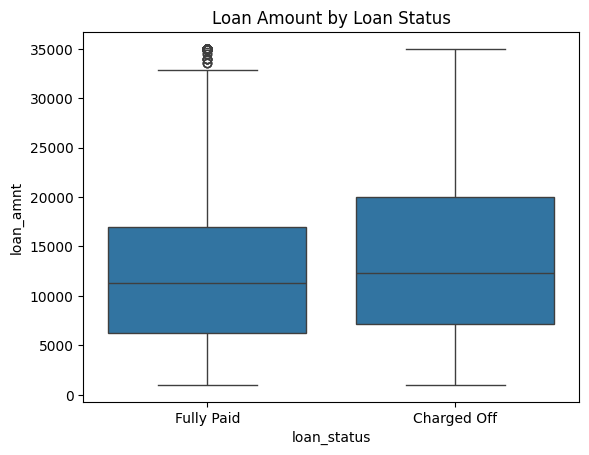

In [ ]:
# Example: Relationship between loan amount and loan status
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title("Loan Amount by Loan Status")
plt.show()

# Explore relationships between other variables


In [ ]:
# Example: Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['verification_status', 'home_ownership', 'purpose'])

# Scale numerical variables if necessary


In [ ]:
necessary_columns = [
    'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
    'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
    'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
    'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'hardship_flag', 'debt_settlement_flag'
]

# Filter the dataset to keep only necessary columns
data_filtered = data[column_names]

# Display the first few rows of the filtered dataset
print(data_filtered.head())

   Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501       5000         5000           4975.0   36 months   
1           1  1077430       2500         2500           2500.0   60 months   
2           2  1077175       2400         2400           2400.0   36 months   
3           3  1076863      10000        10000          10000.0   36 months   
4           4  1075358       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               NaN                    

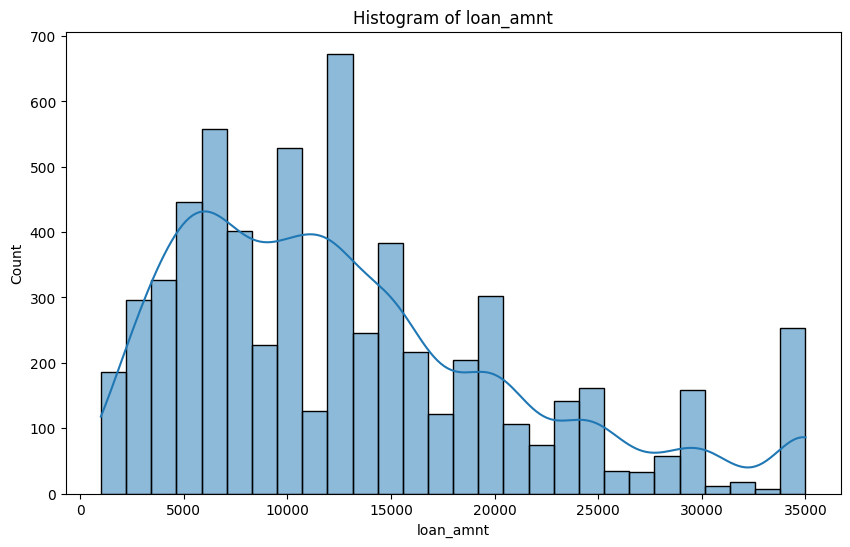

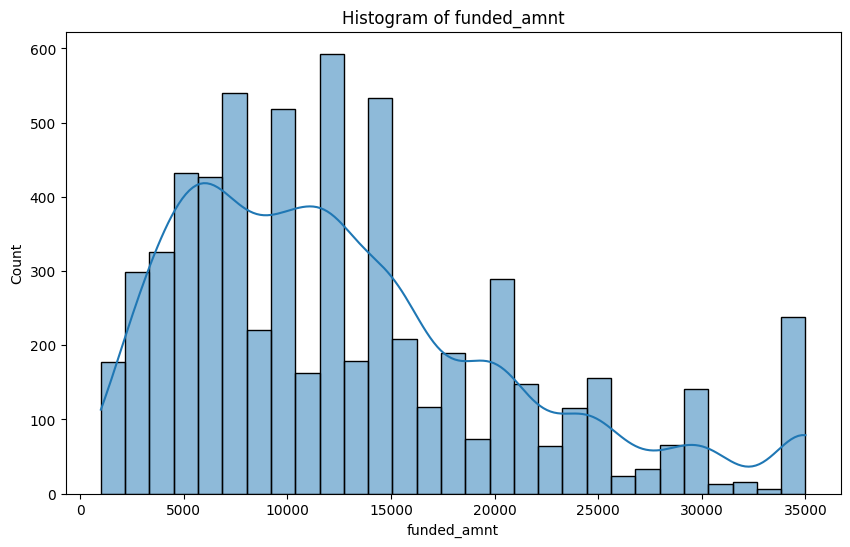

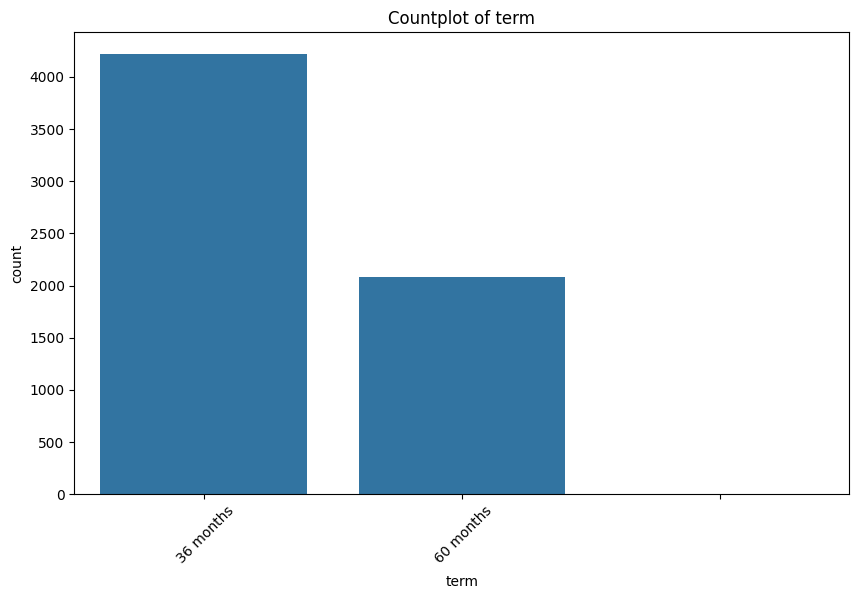

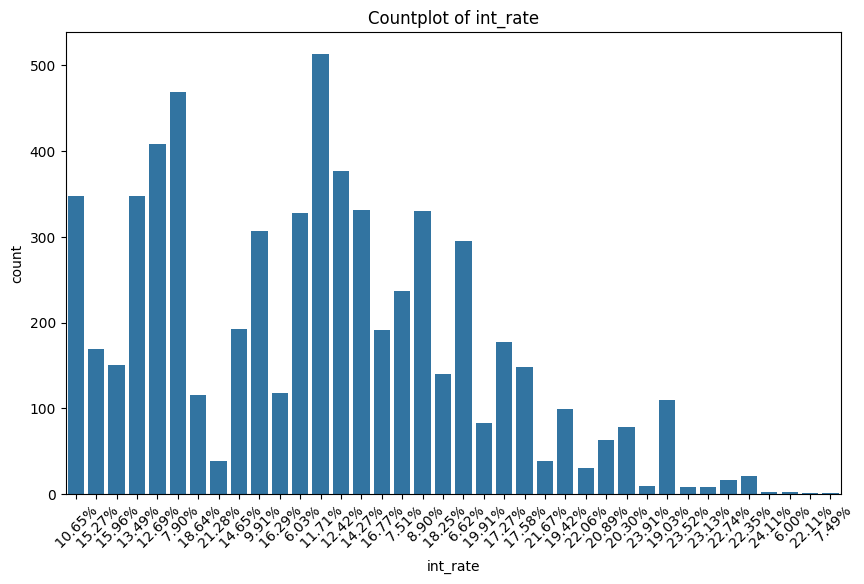

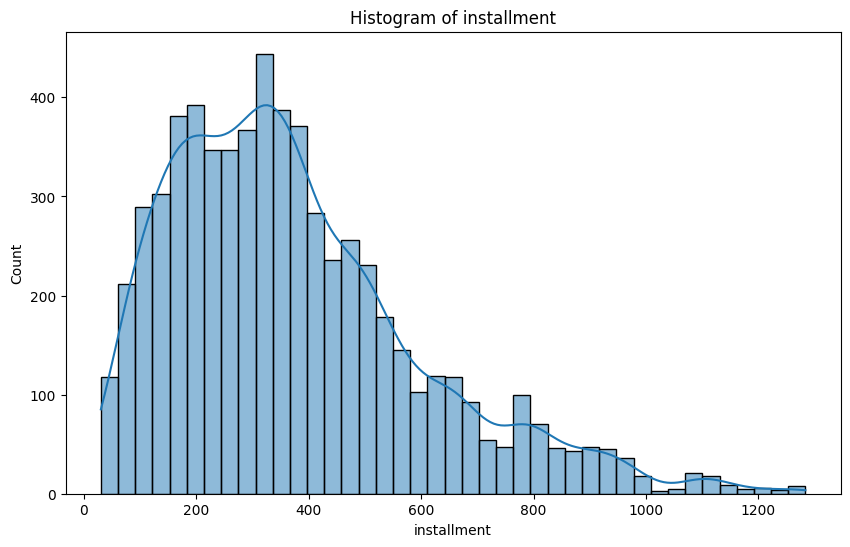

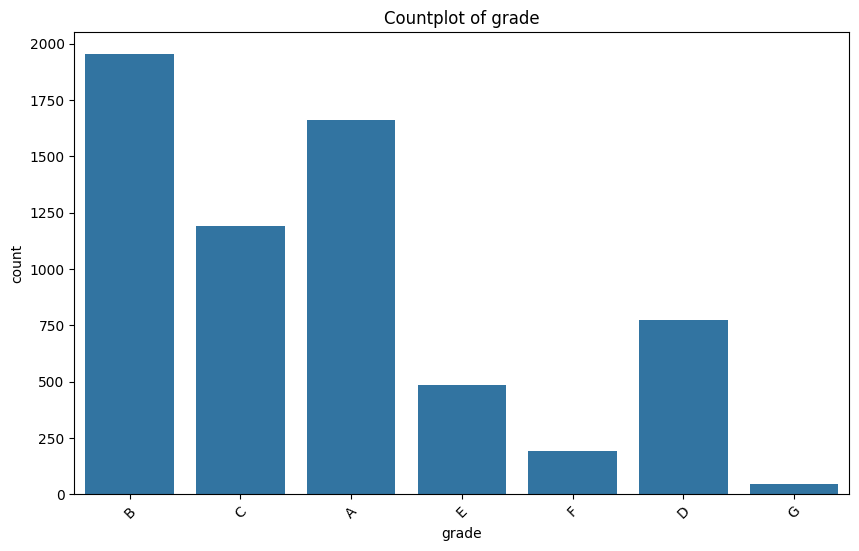

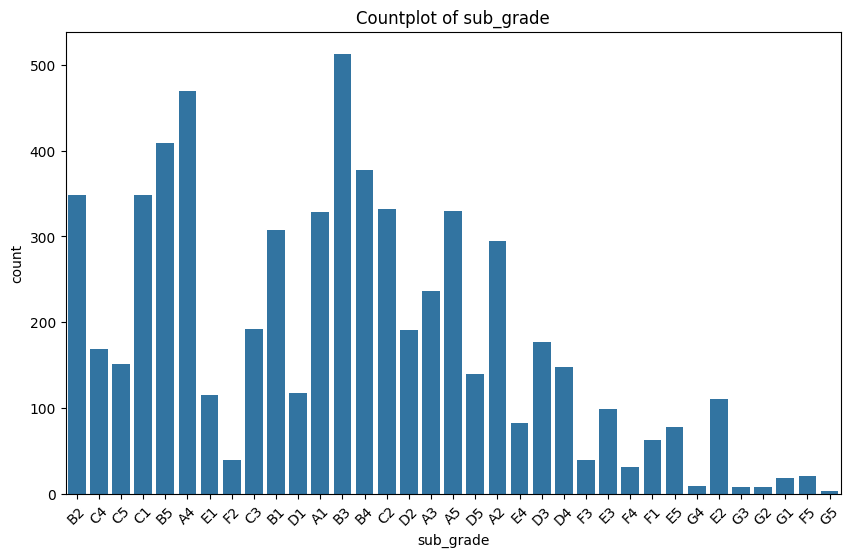

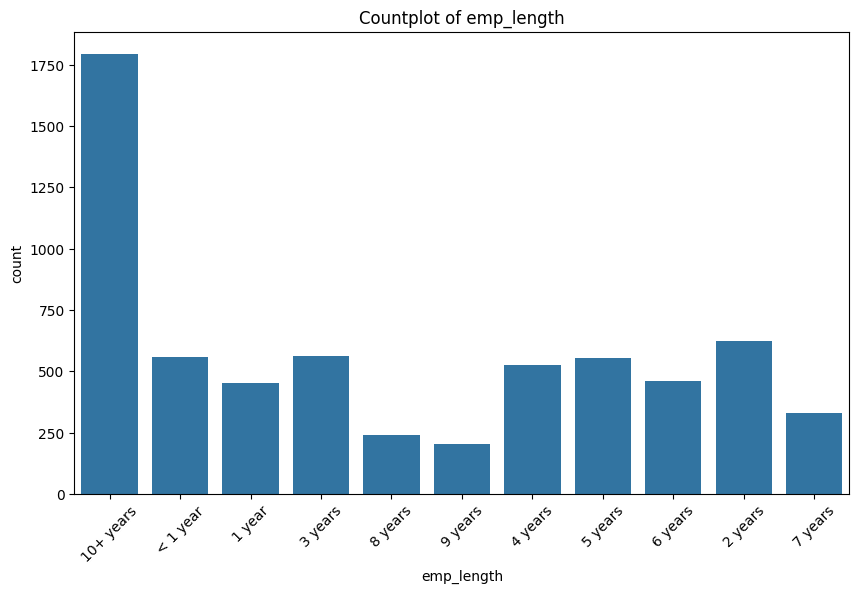

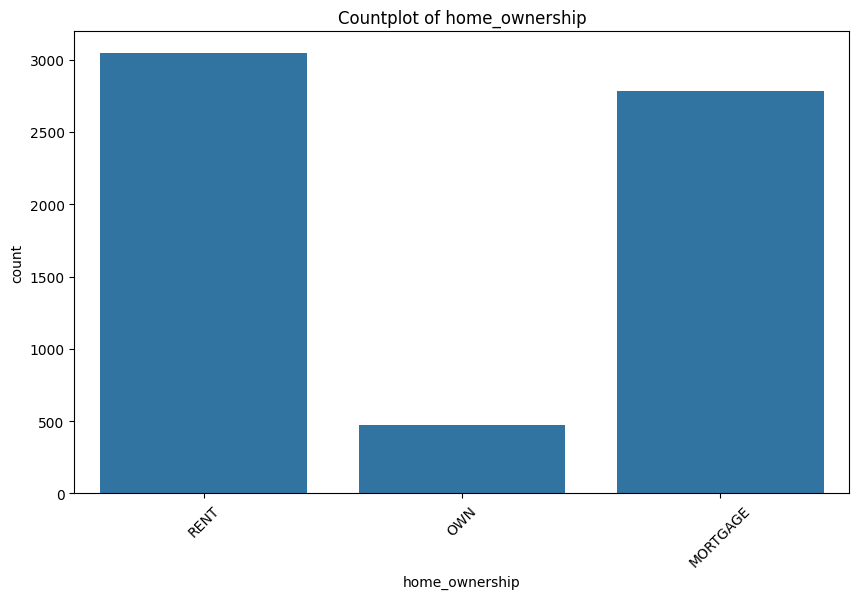

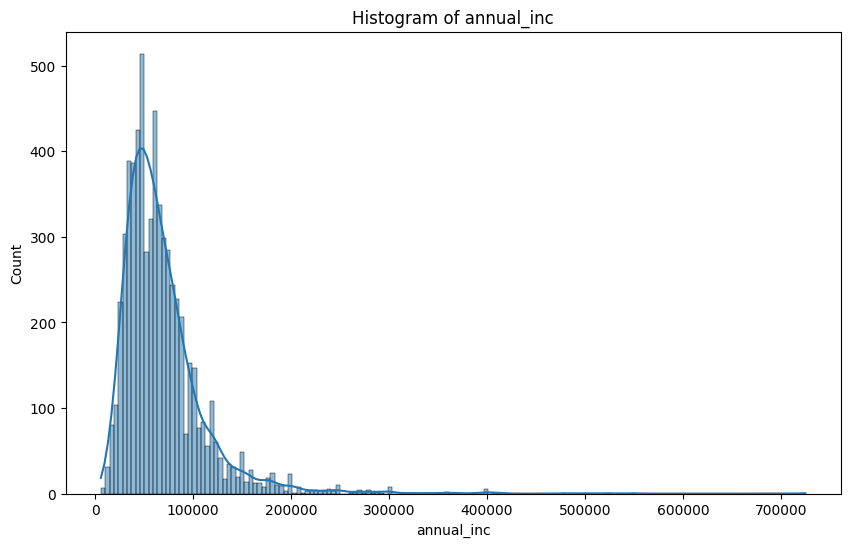

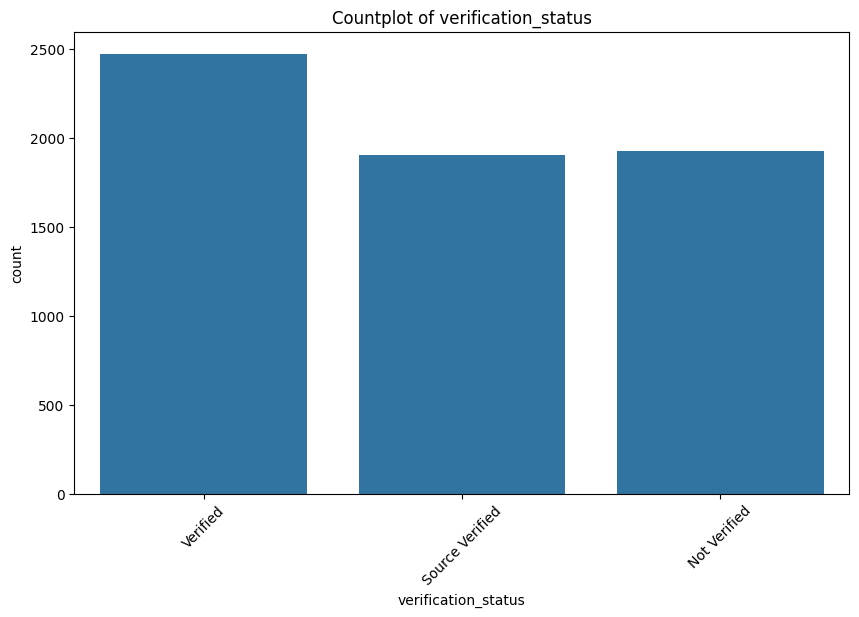

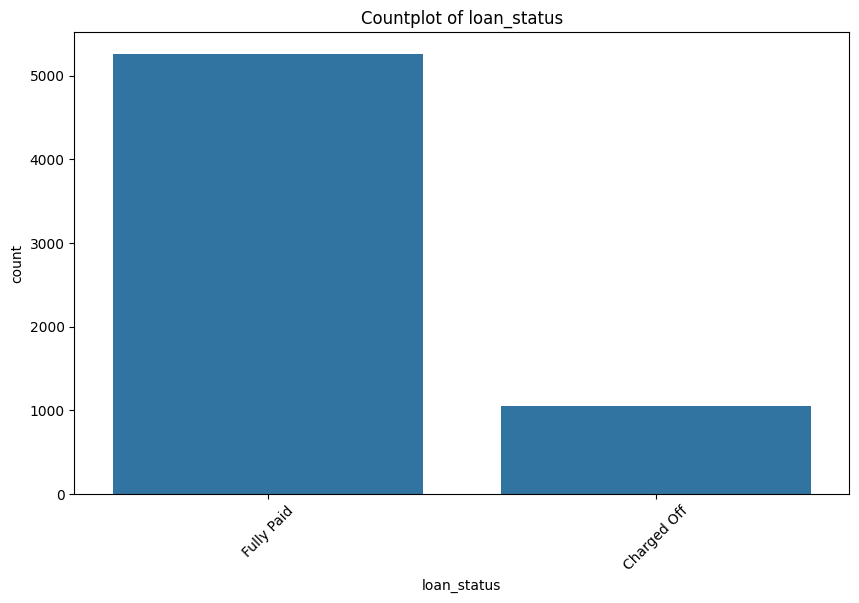

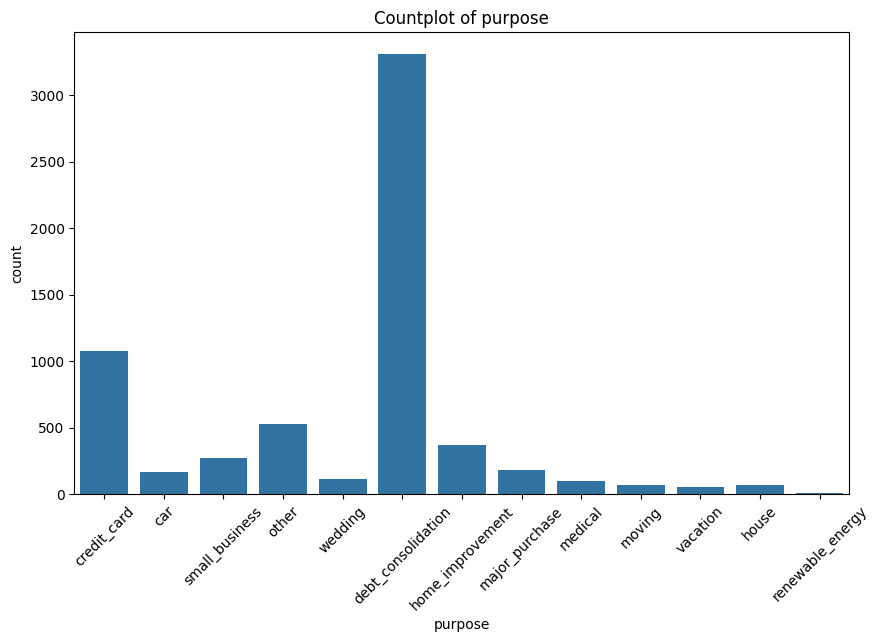

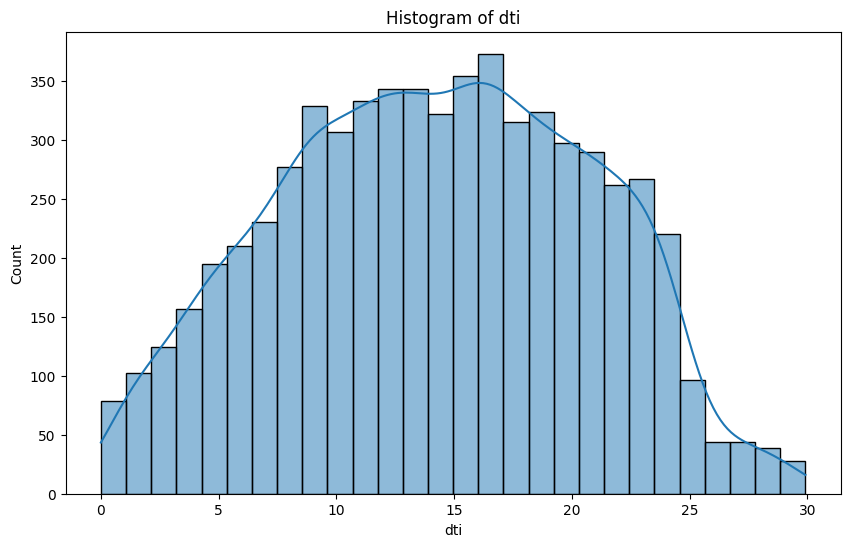

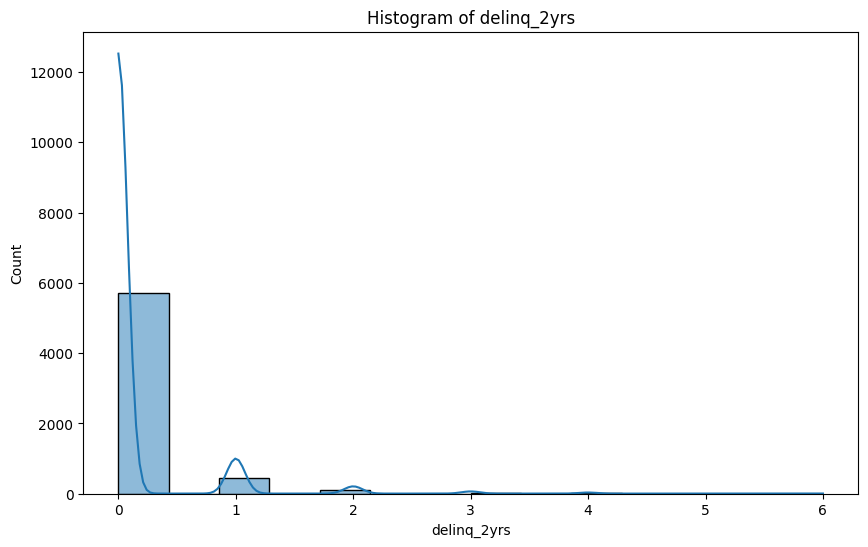

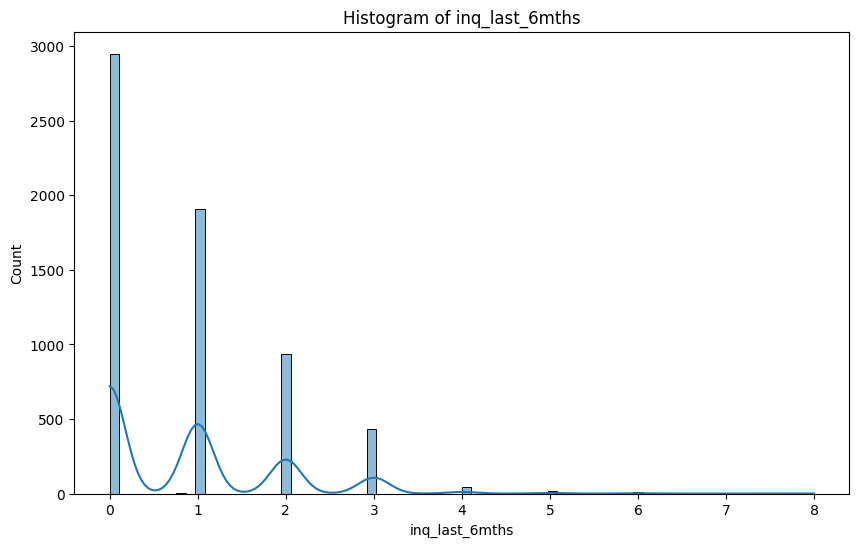

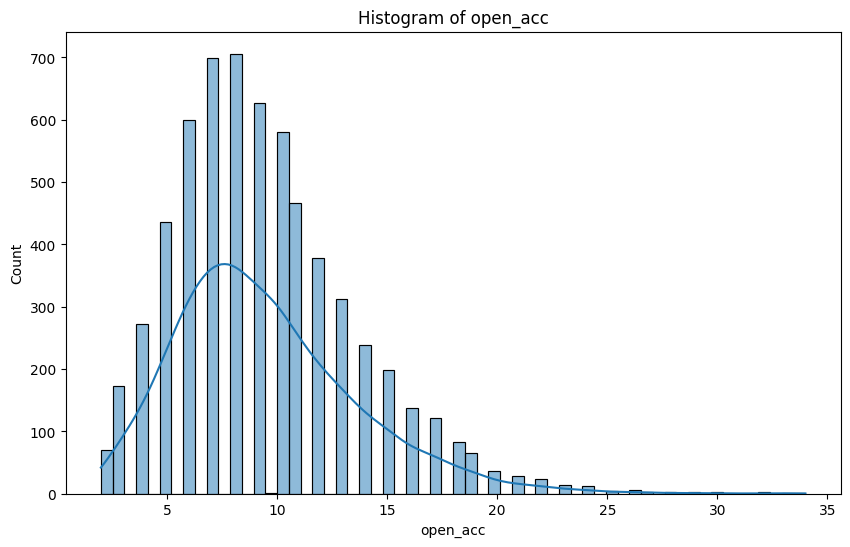

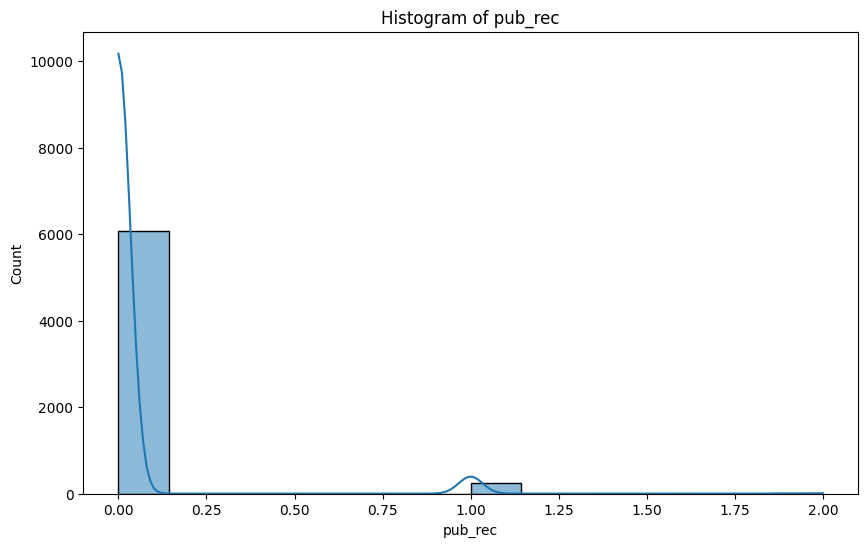

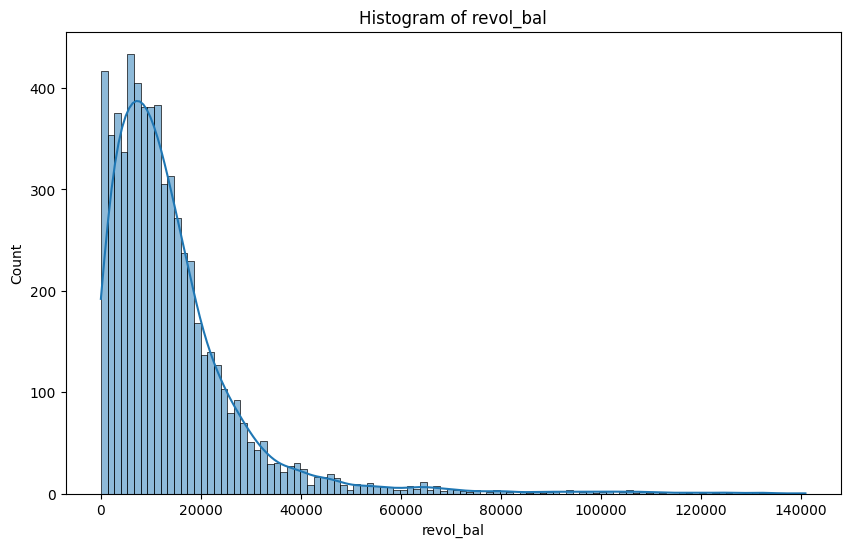

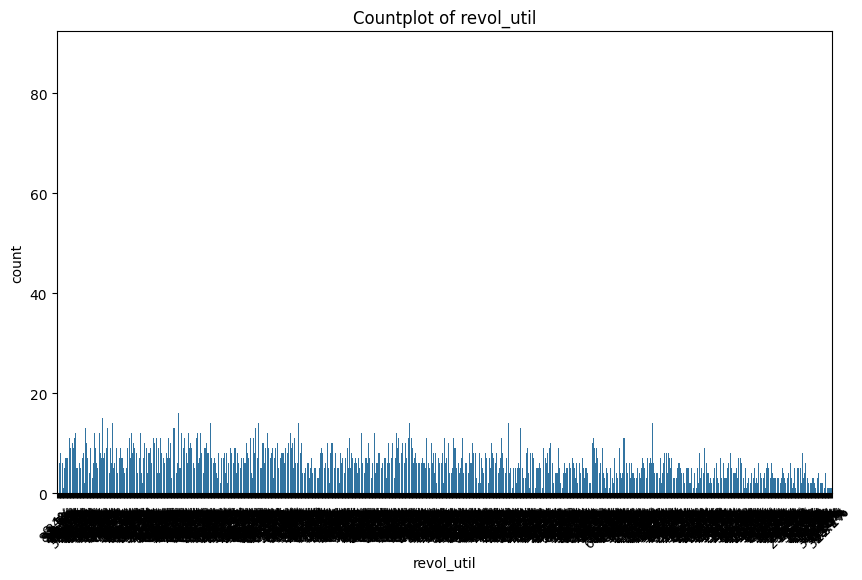

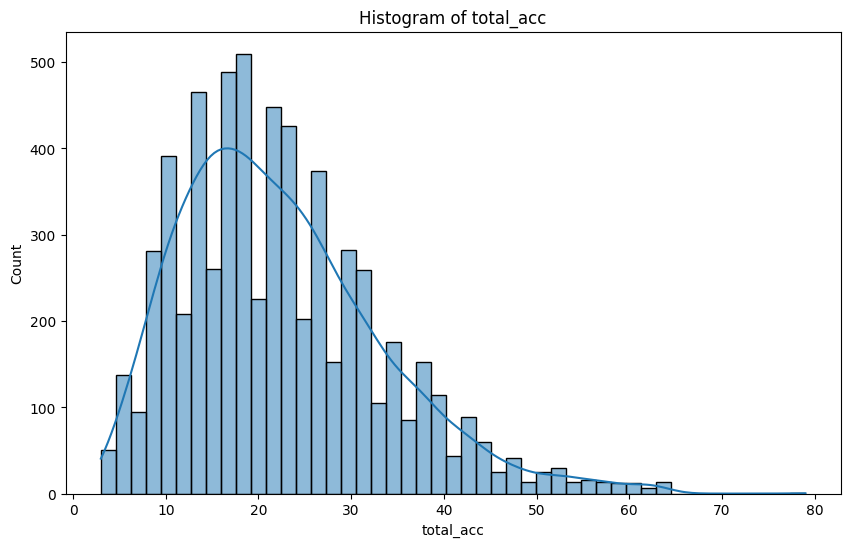

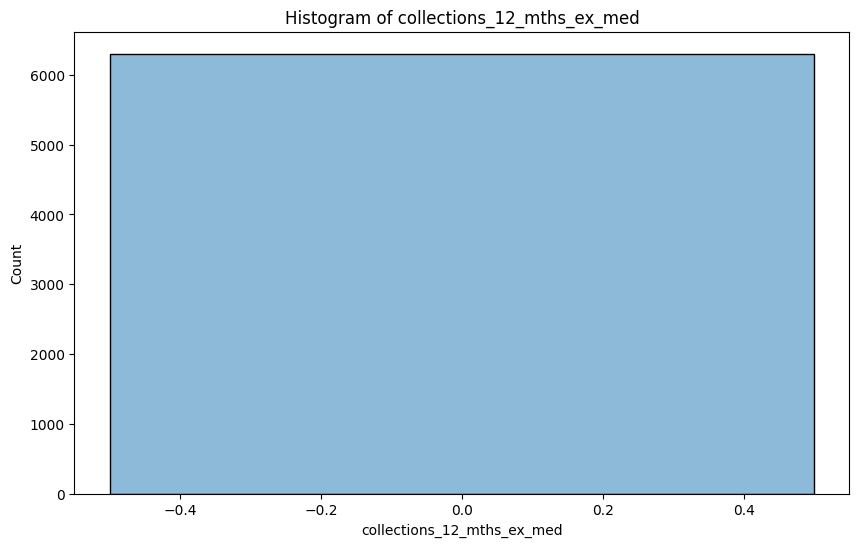

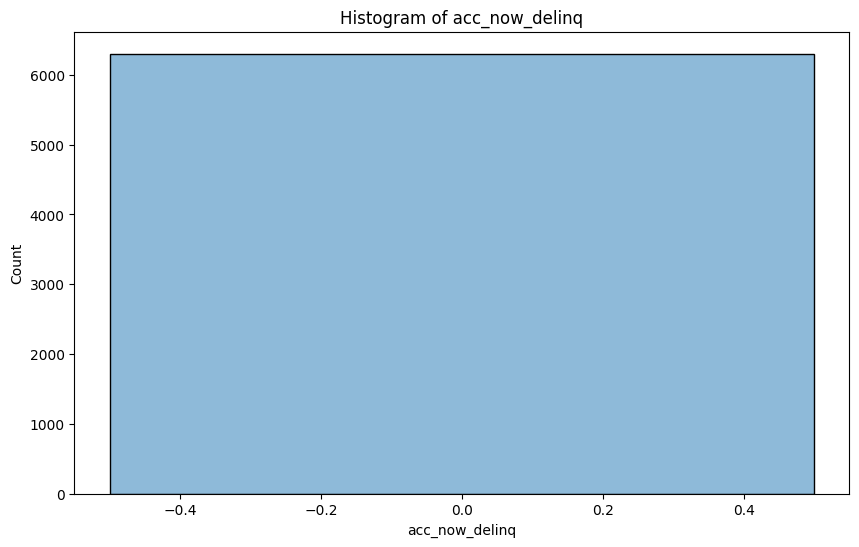

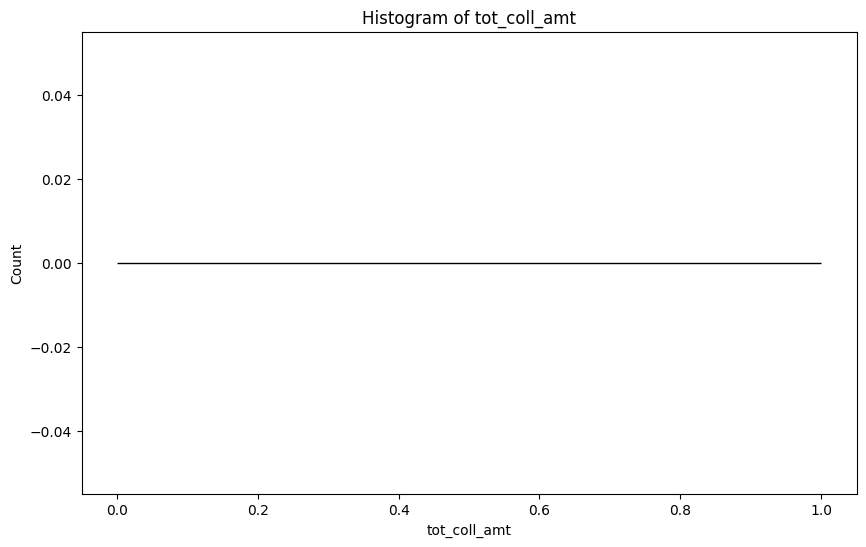

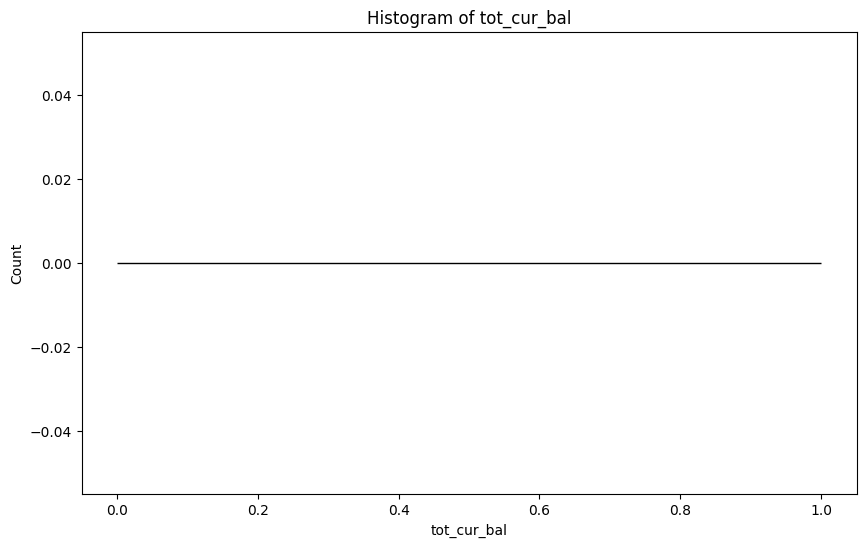

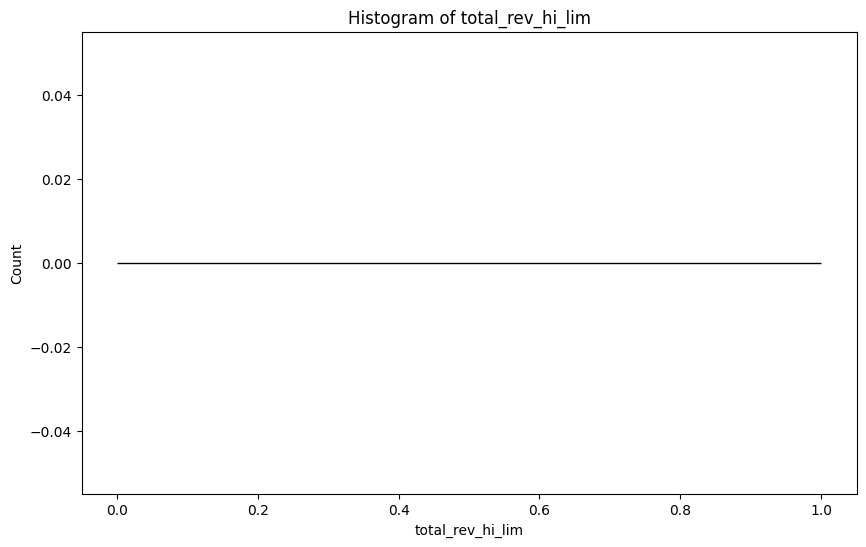

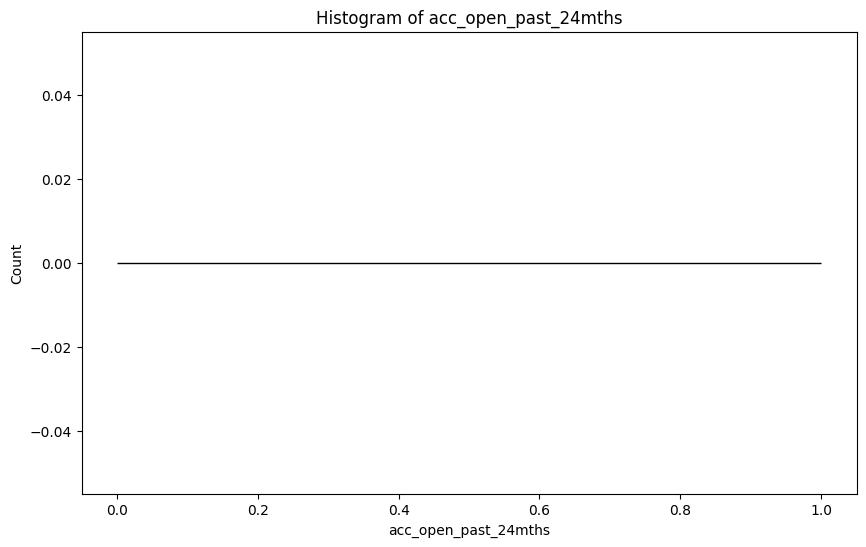

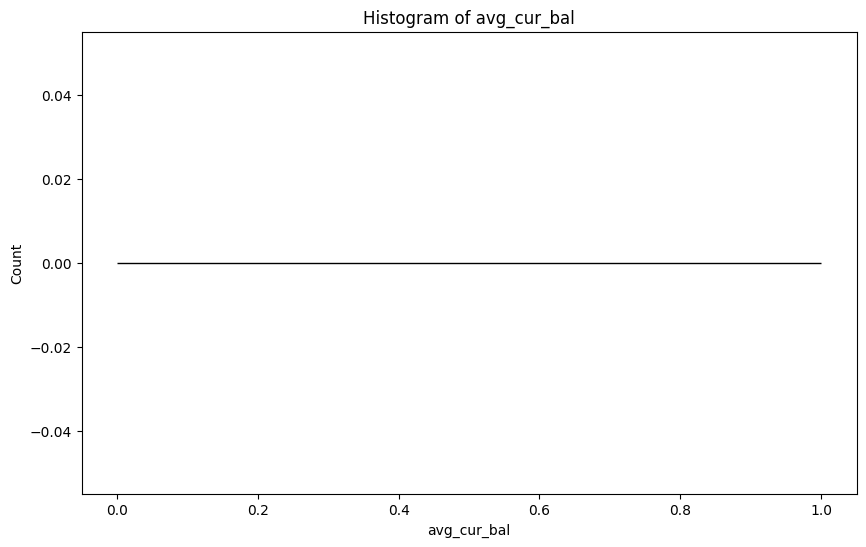

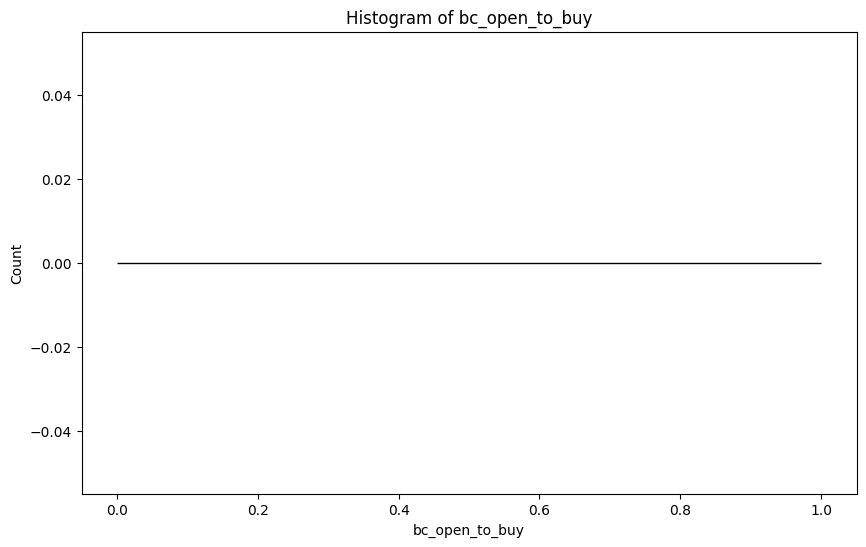

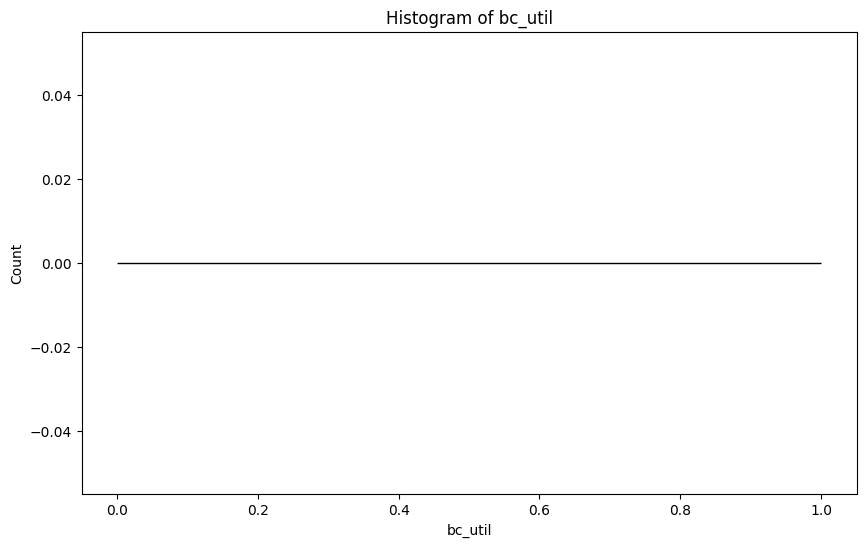

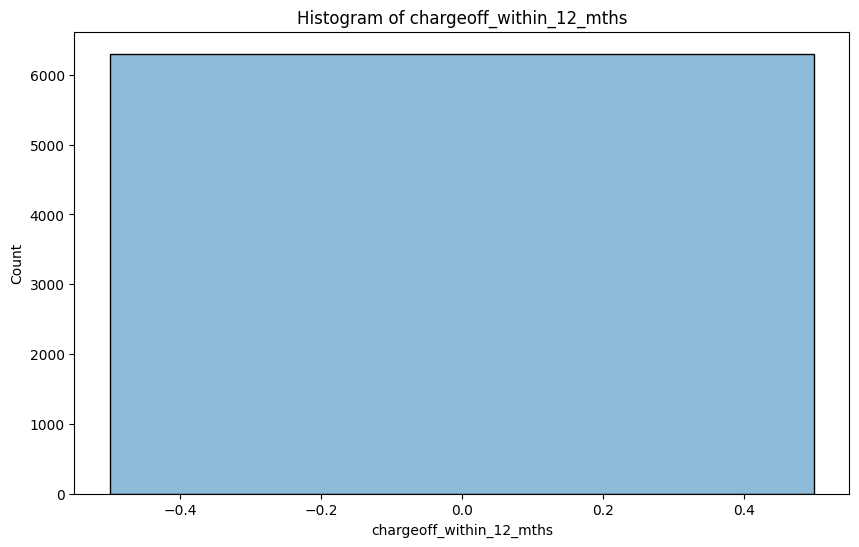

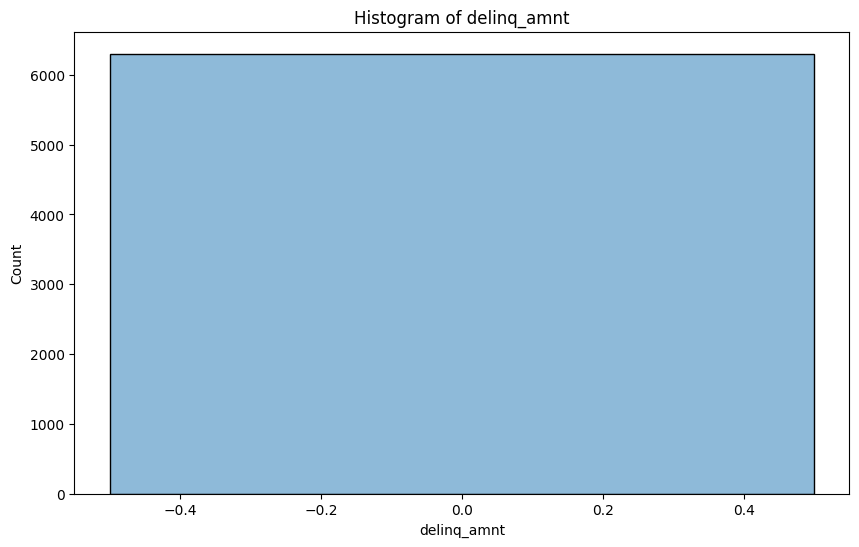

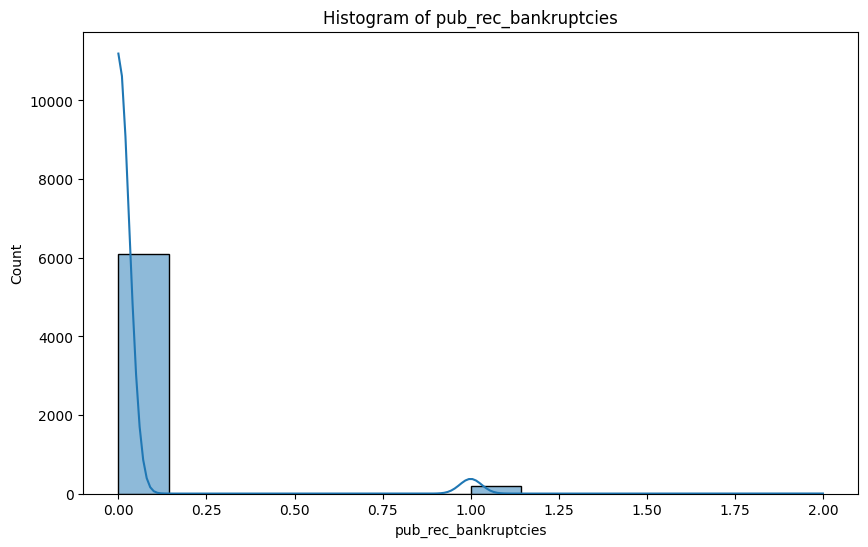

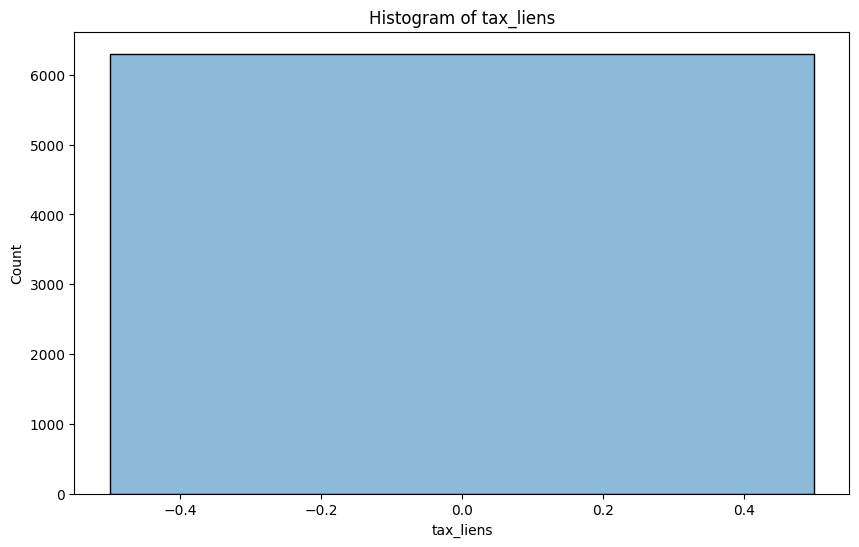

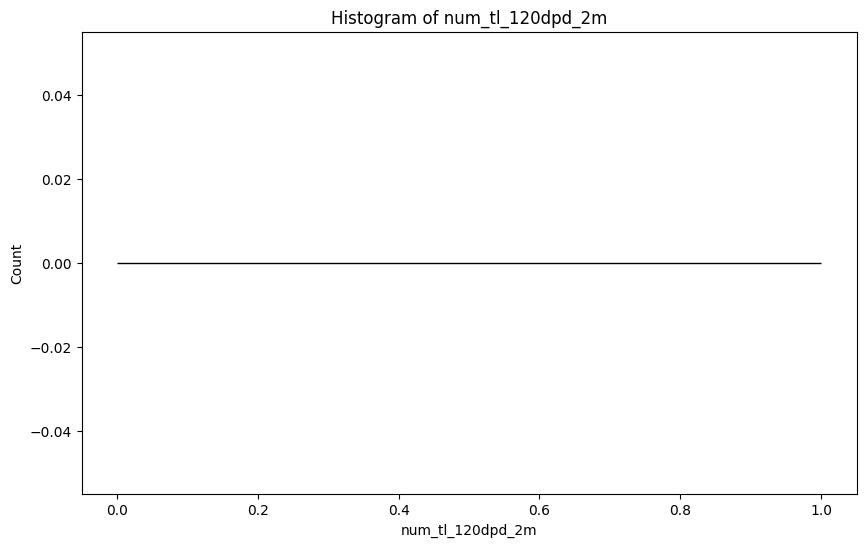

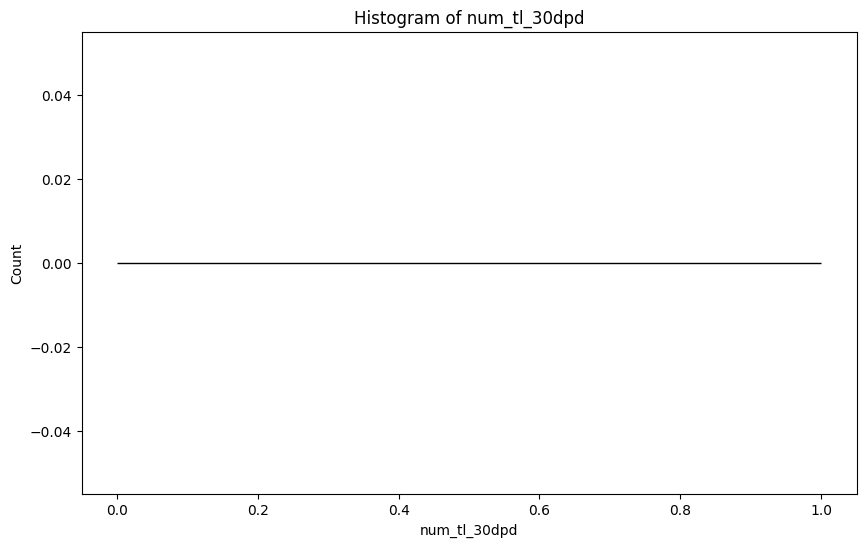

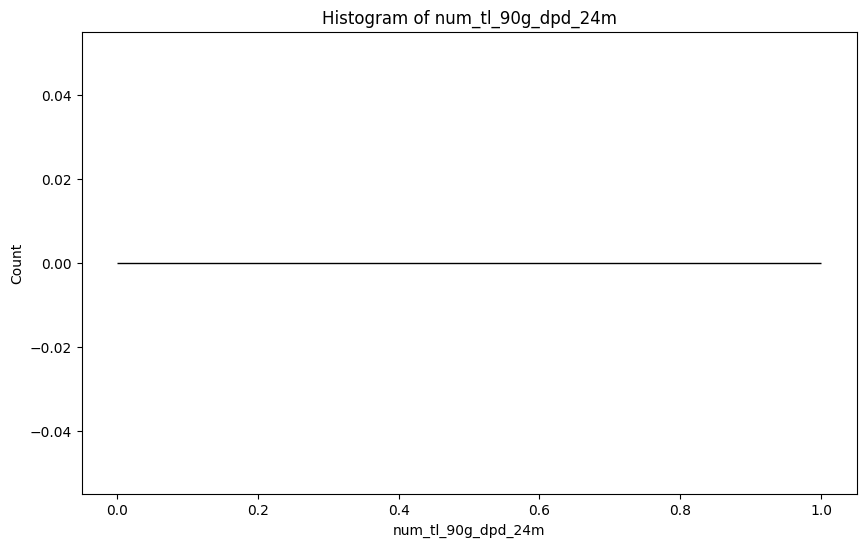

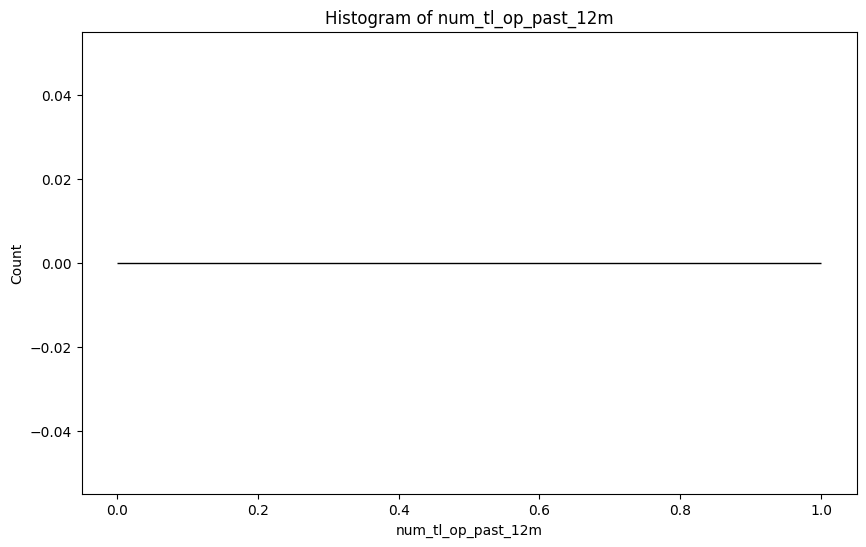

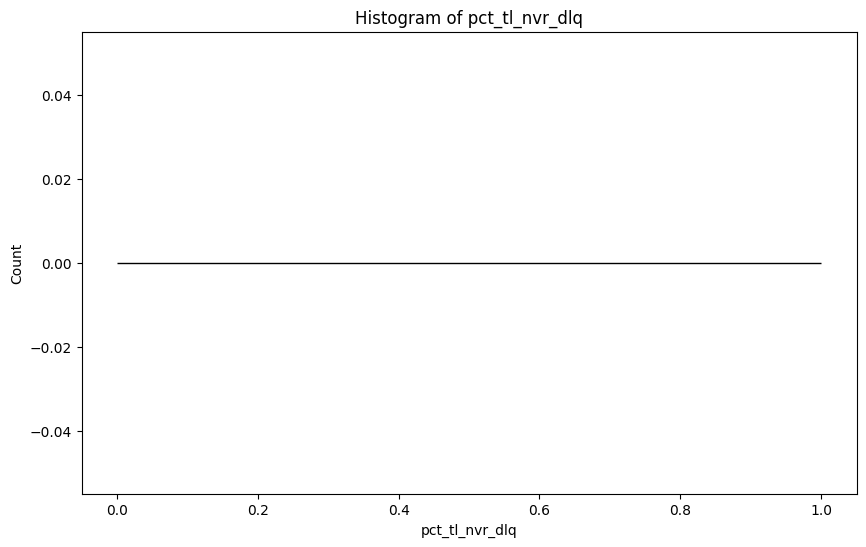

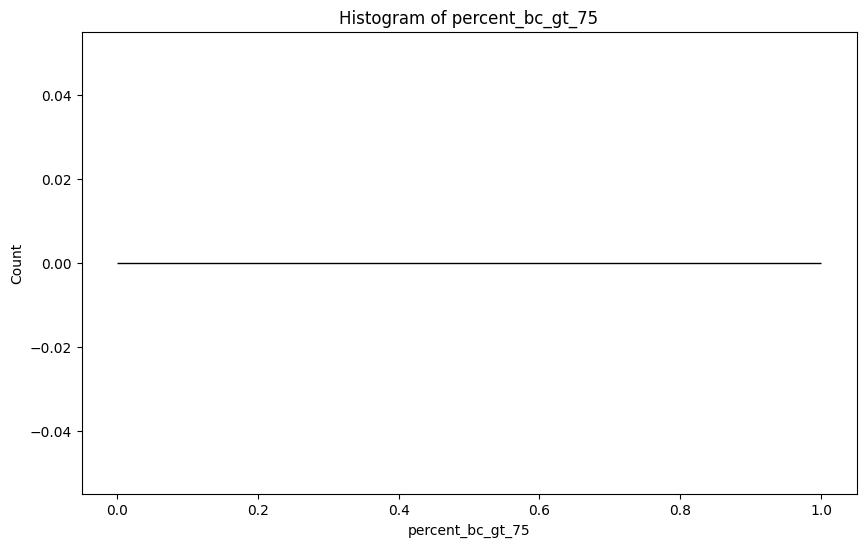

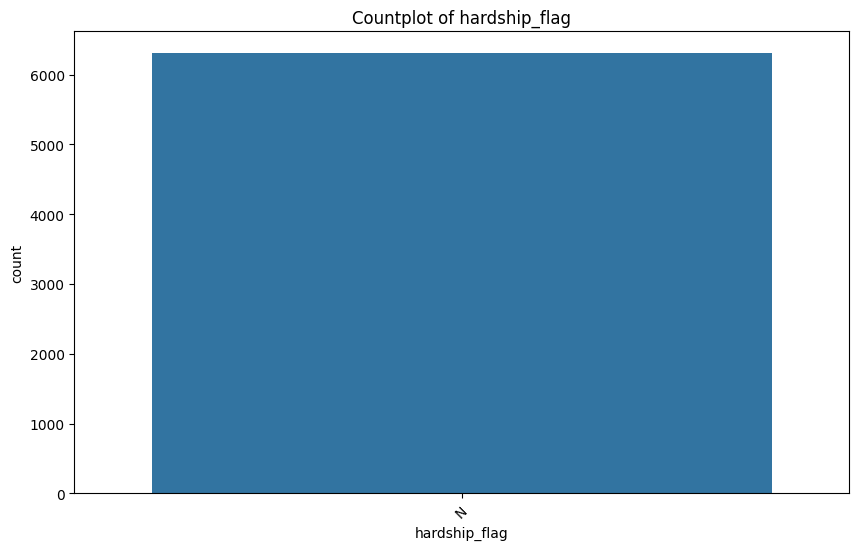

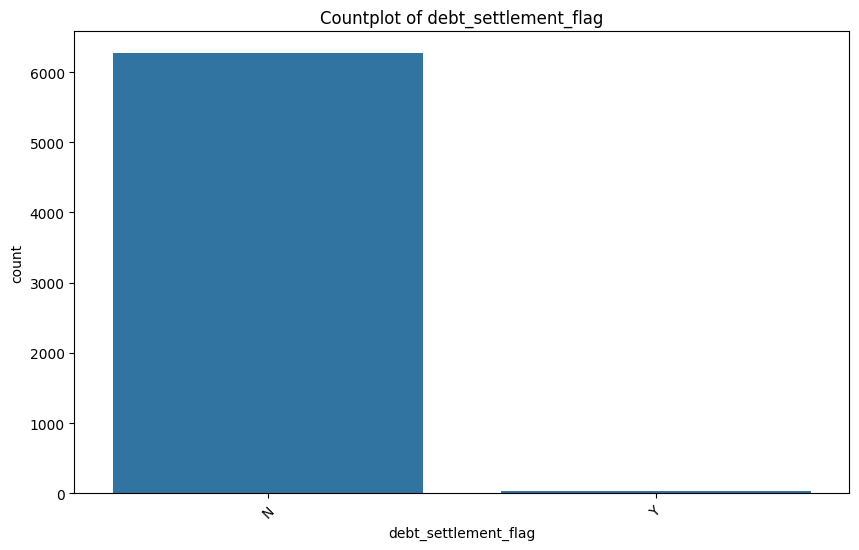

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the subset of columns for EDA
columns_for_eda = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                   'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
                   'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
                   'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
                   'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
                   'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                   'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
                   'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
                   'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'hardship_flag', 'debt_settlement_flag']

# Loop through each column for EDA
for column in columns_for_eda:
    plt.figure(figsize=(10, 6))  # Set the figure size

    if data[column].dtype == 'object':  # For categorical columns
        sns.countplot(x=column, data=data)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.title(f"Countplot of {column}")
        plt.show()

    elif data[column].dtype in ['int64', 'float64']:  # For numerical columns
        sns.histplot(data[column], kde=True)
        plt.title(f"Histogram of {column}")
        plt.show()




<ipython-input-30-172cac144fed>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_filtered['loan_amnt'])


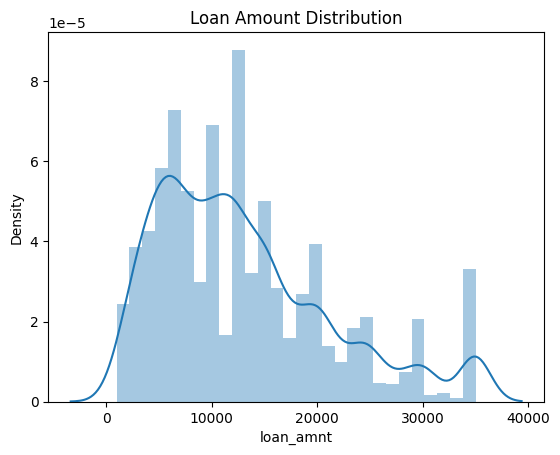

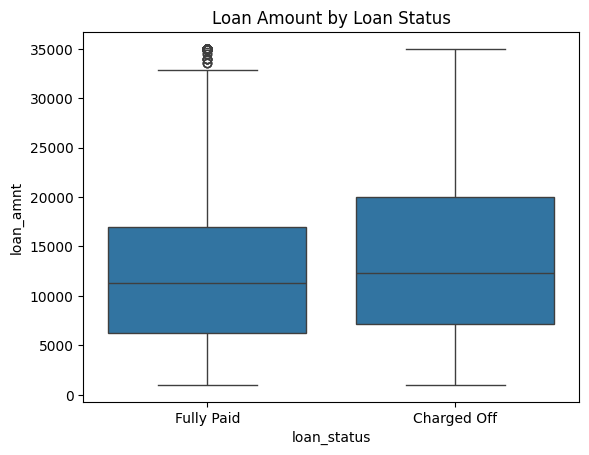

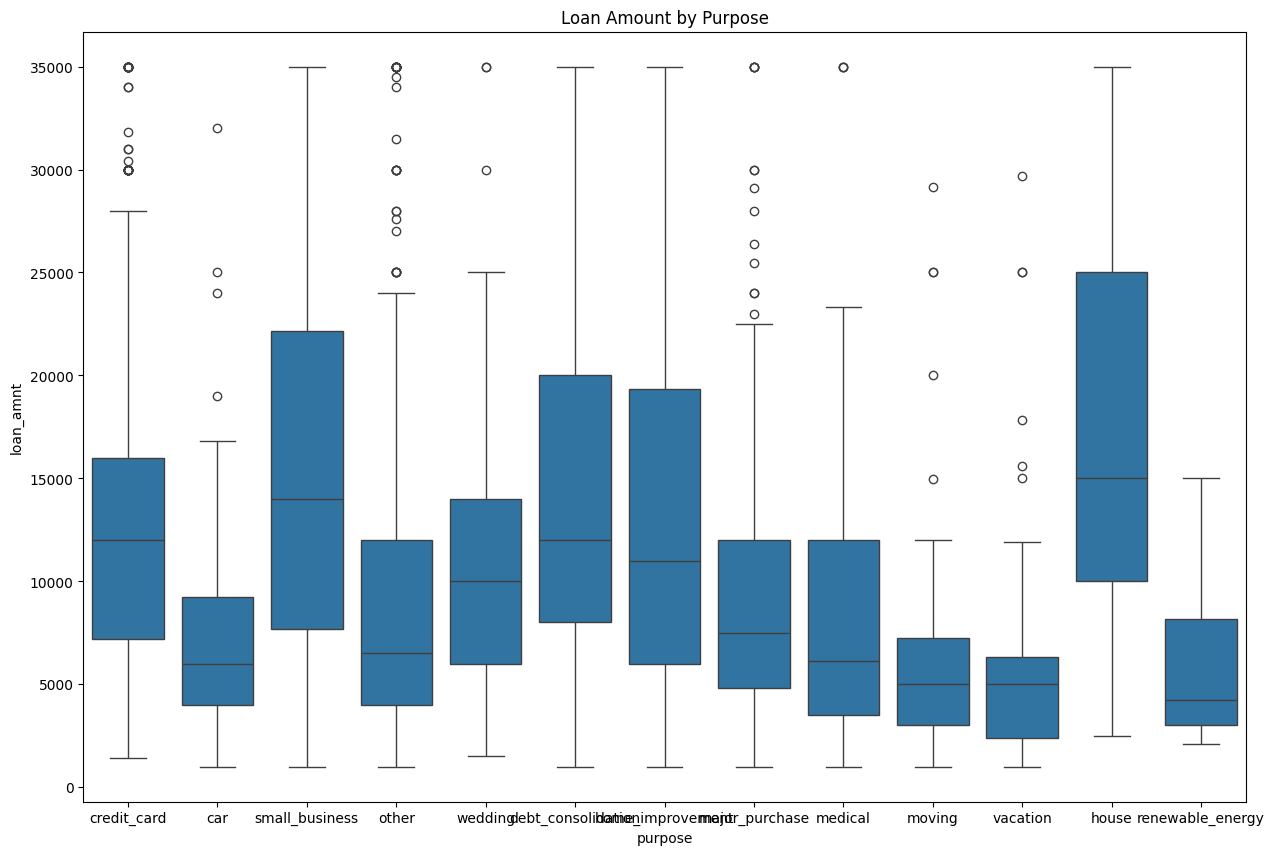

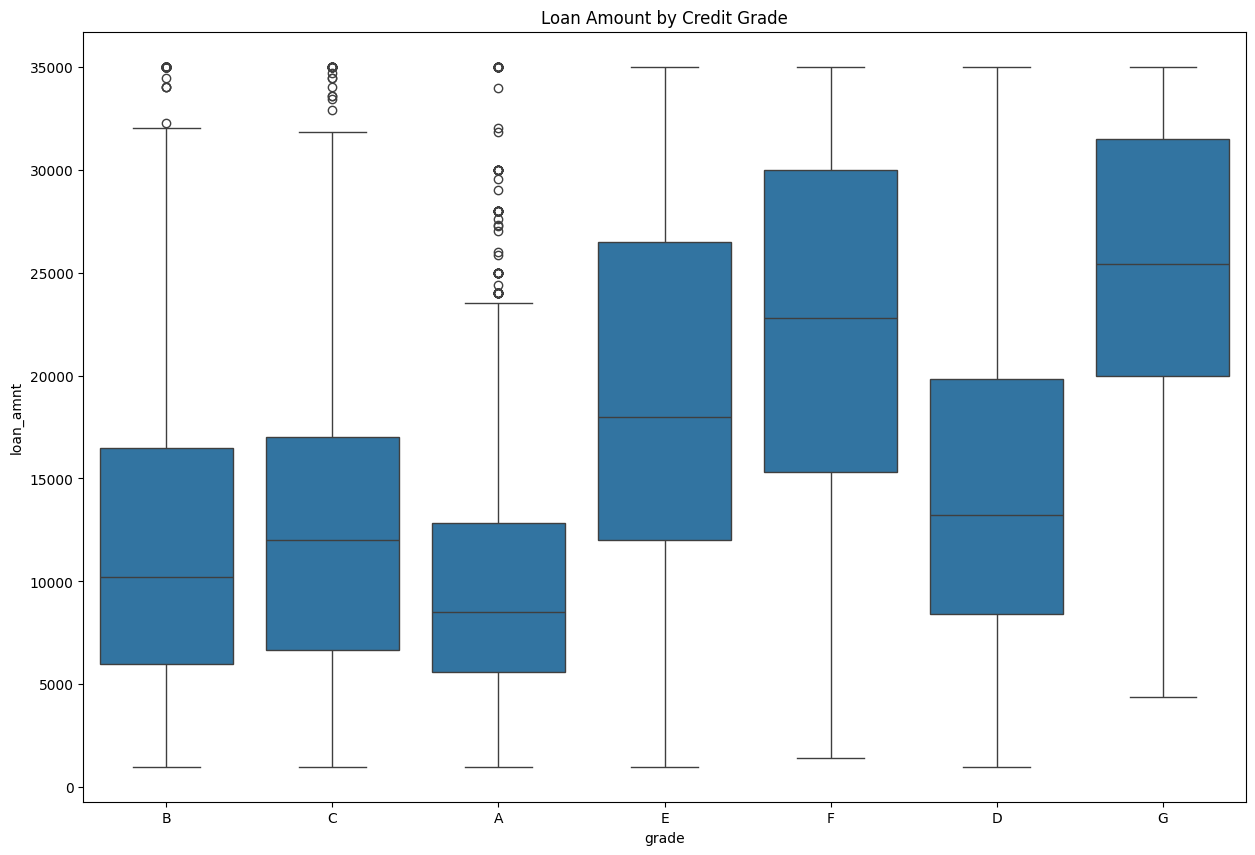

In [ ]:
# prompt: loanmaount eda

import matplotlib.pyplot as plt
# Loan amount distribution
sns.distplot(data_filtered['loan_amnt'])
plt.title("Loan Amount Distribution")
plt.show()

# Relationship between loan amount and loan status
sns.boxplot(x='loan_status', y='loan_amnt', data=data_filtered)
plt.title("Loan Amount by Loan Status")
plt.show()

# Relationship between loan amount and other variables
# corr_matrix = data_filtered.corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.title("Correlation Matrix")
# plt.show()

# Loan amount by purpose
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Boxplot: Loan amount by purpose
sns.boxplot(x='purpose', y='loan_amnt', data=data_filtered)
plt.title("Loan Amount by Purpose")
plt.show()

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Boxplot: Loan amount by credit grade
sns.boxplot(x='grade', y='loan_amnt', data=data_filtered)
plt.title("Loan Amount by Credit Grade")
plt.show()
# Explore other relationships and patterns related to loan amount


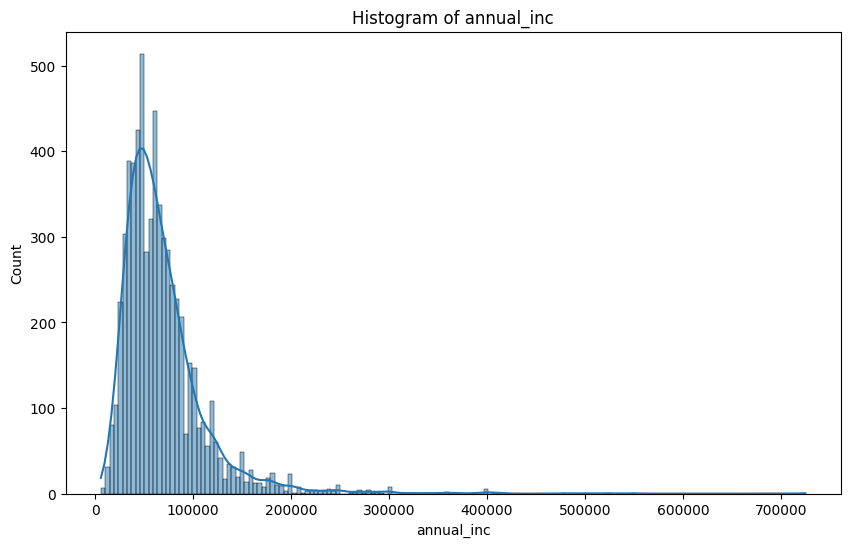

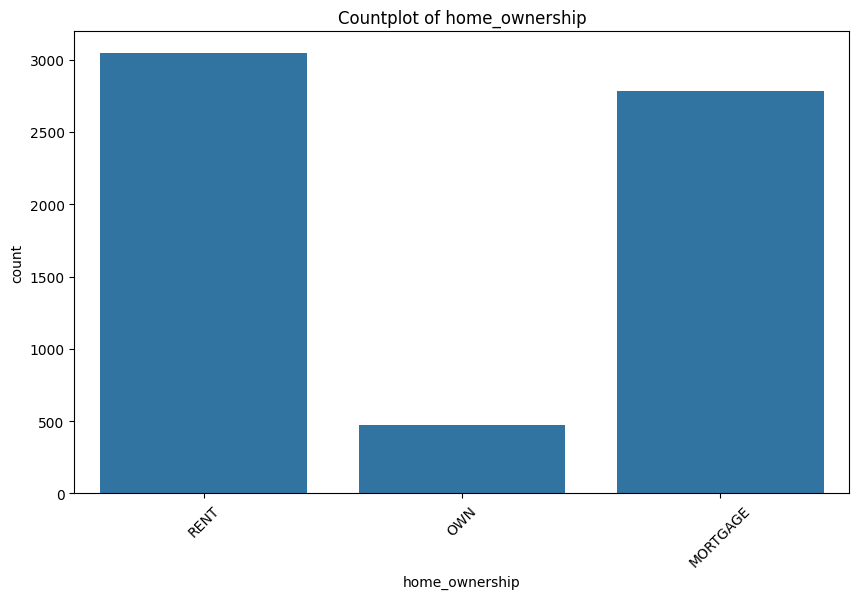

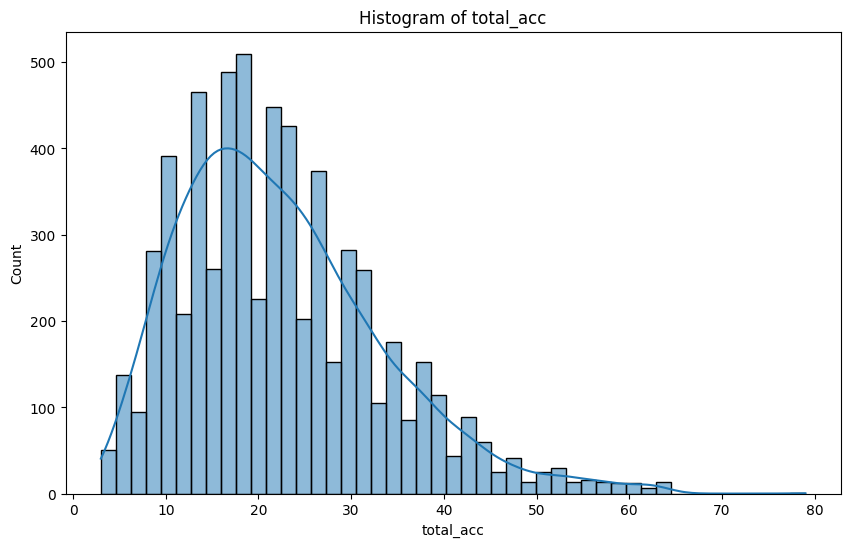

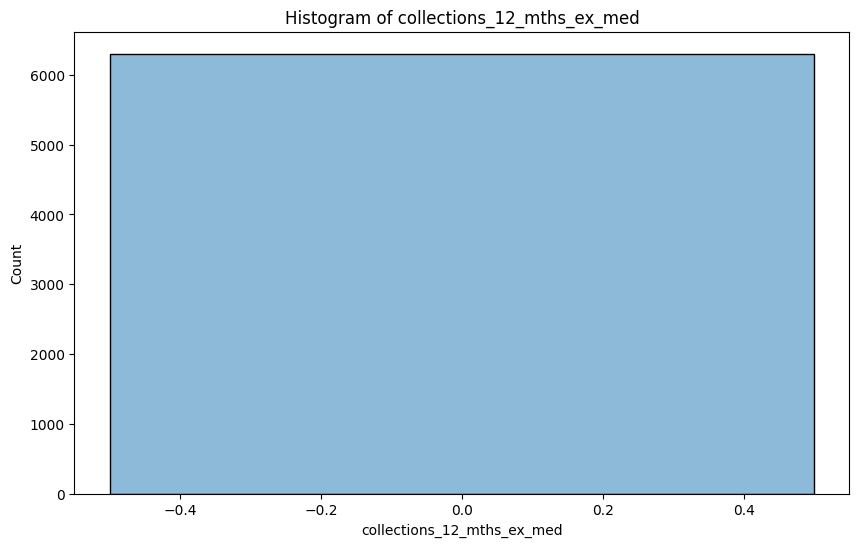

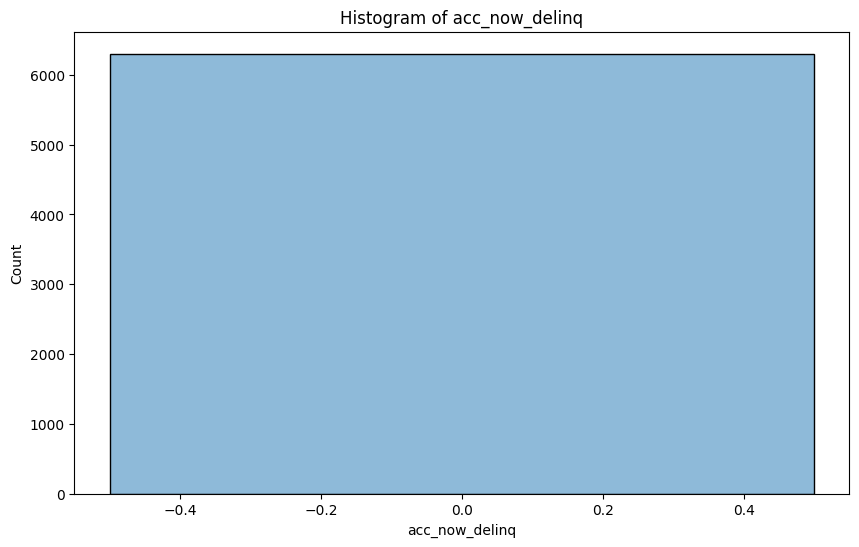

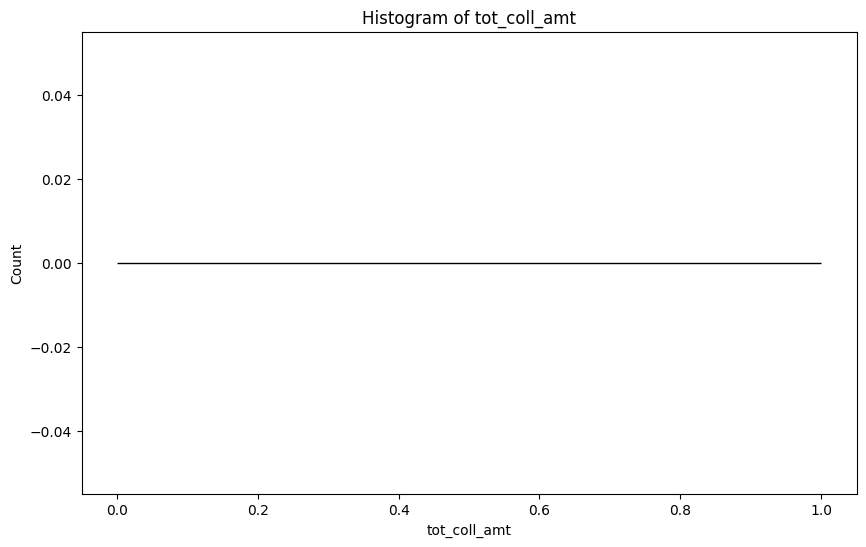

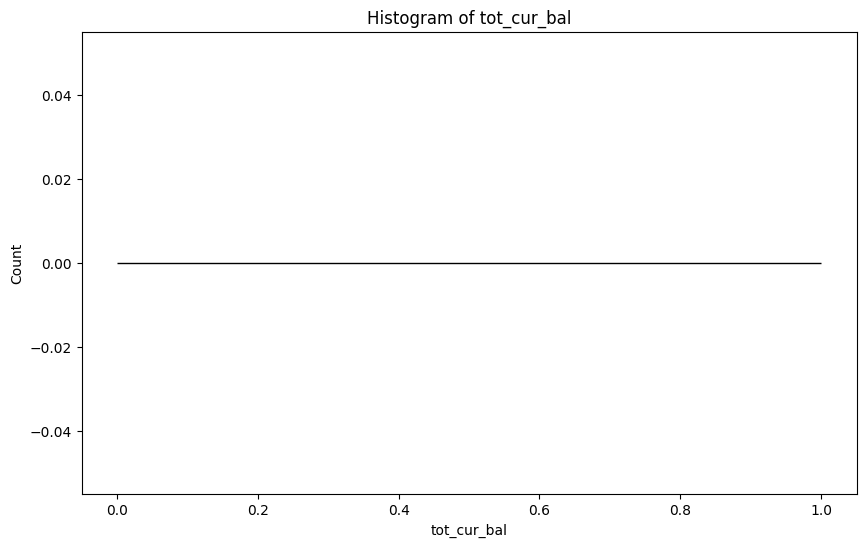

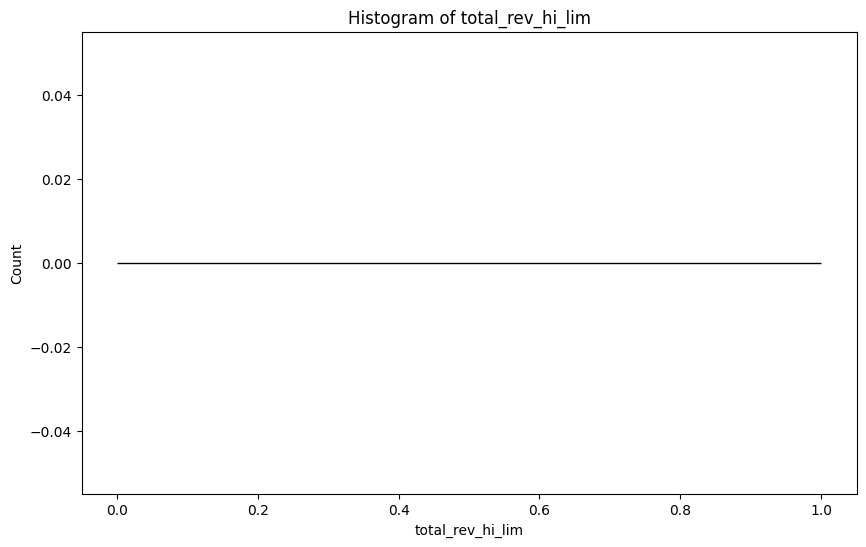

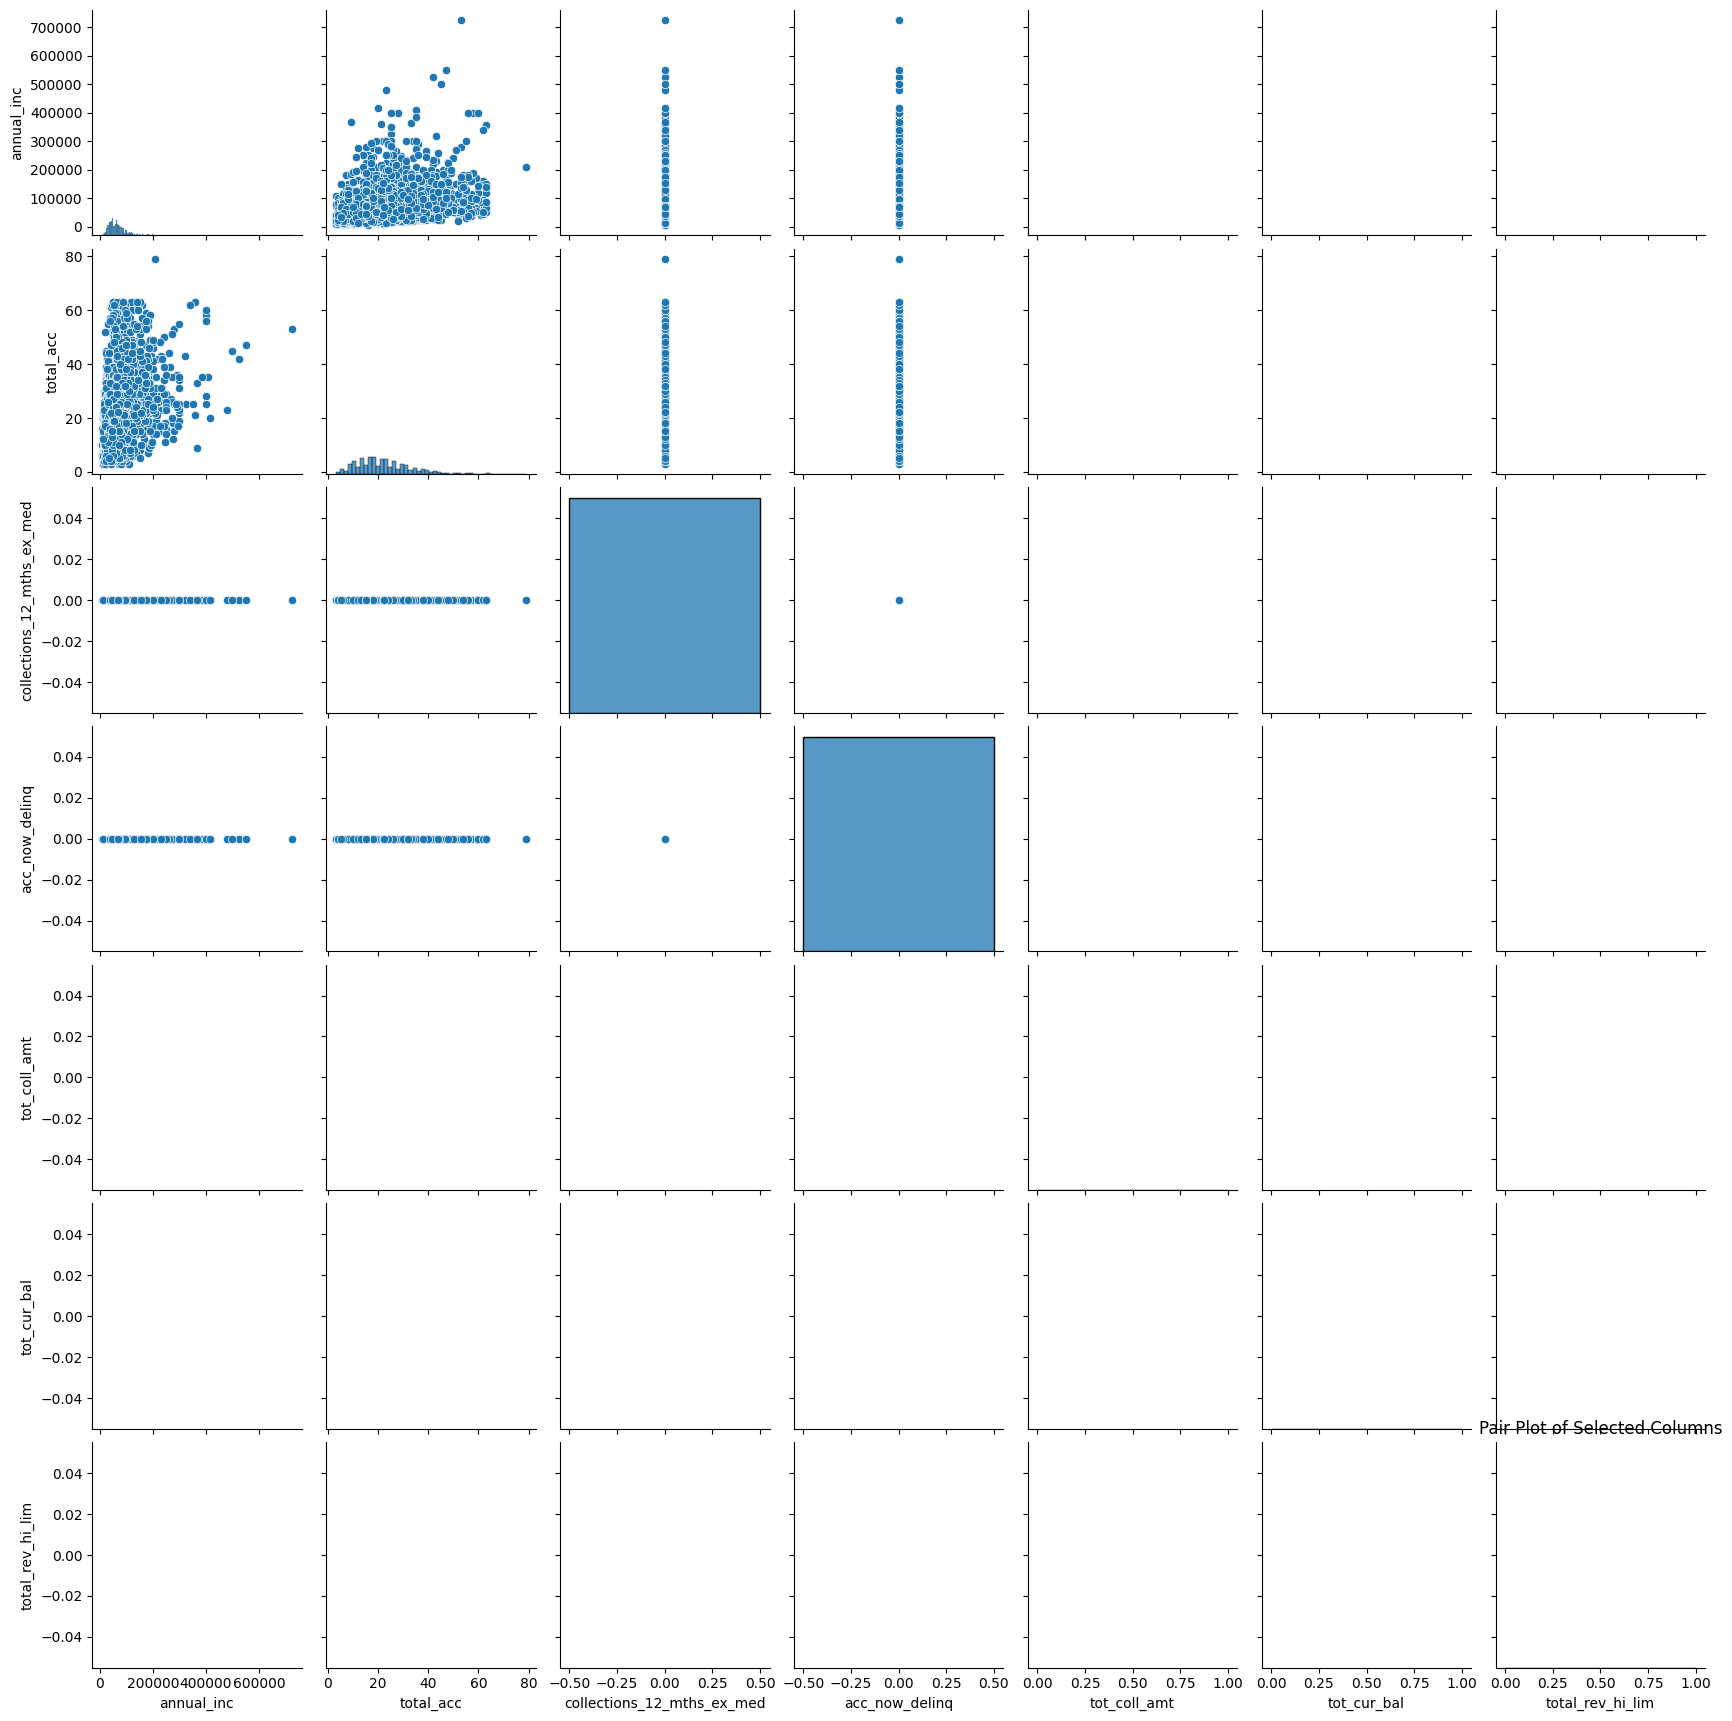

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the subset of columns for EDA
columns_for_eda = ['annual_inc', 'home_ownership', 'total_acc', 'collections_12_mths_ex_med',
                   'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# EDA for individual columns
for column in columns_for_eda:
    plt.figure(figsize=(10, 6))  # Set the figure size

    if data[column].dtype == 'object':  # For categorical columns
        sns.countplot(x=column, data=data)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.title(f"Countplot of {column}")
        plt.show()

    elif data[column].dtype in ['int64', 'float64']:  # For numerical columns
        sns.histplot(data[column], kde=True)
        plt.title(f"Histogram of {column}")
        plt.show()



# Pair plot for the specified columns
sns.pairplot(data[columns_for_eda])
plt.title("Pair Plot of Selected Columns")
plt.show()


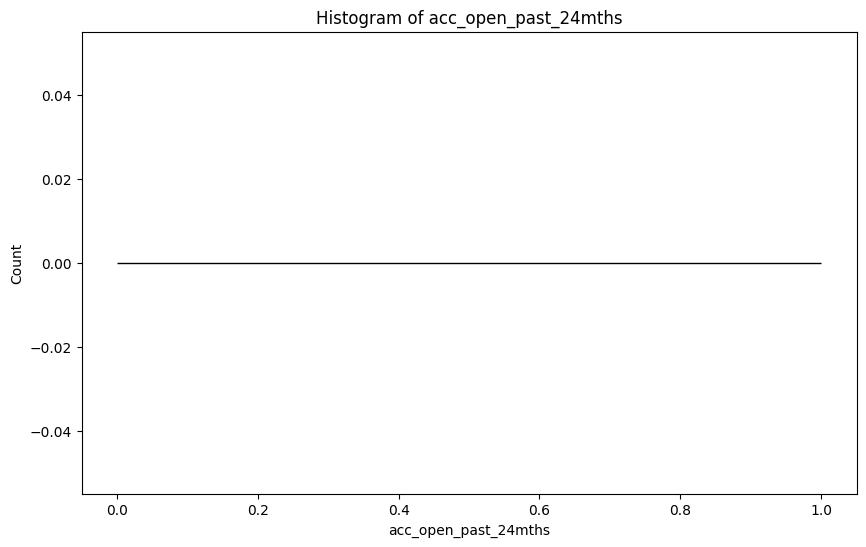

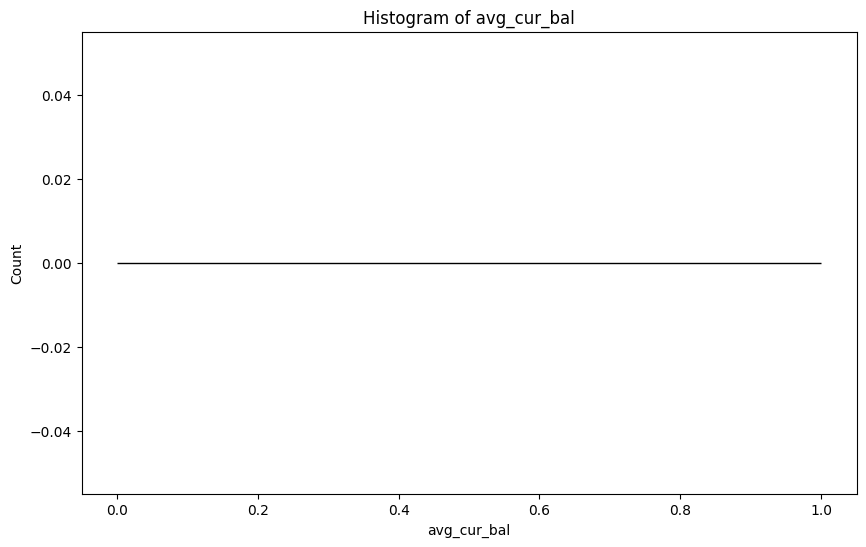

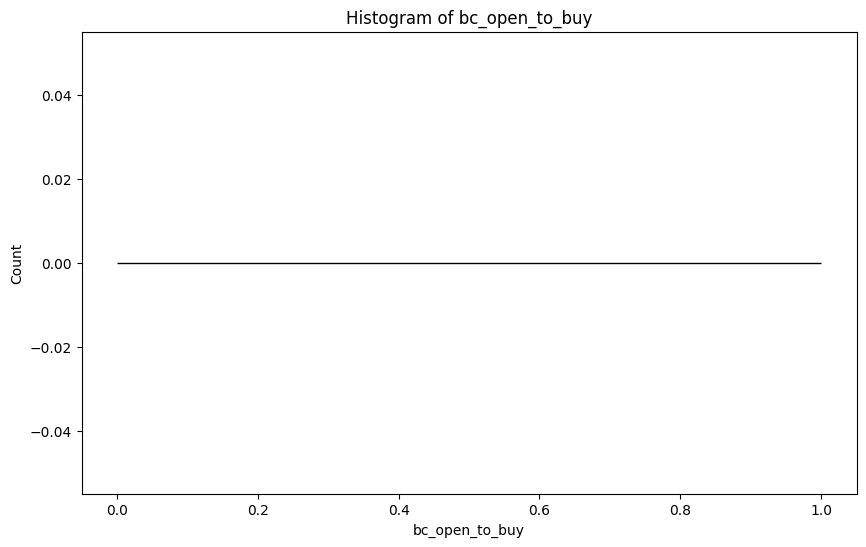

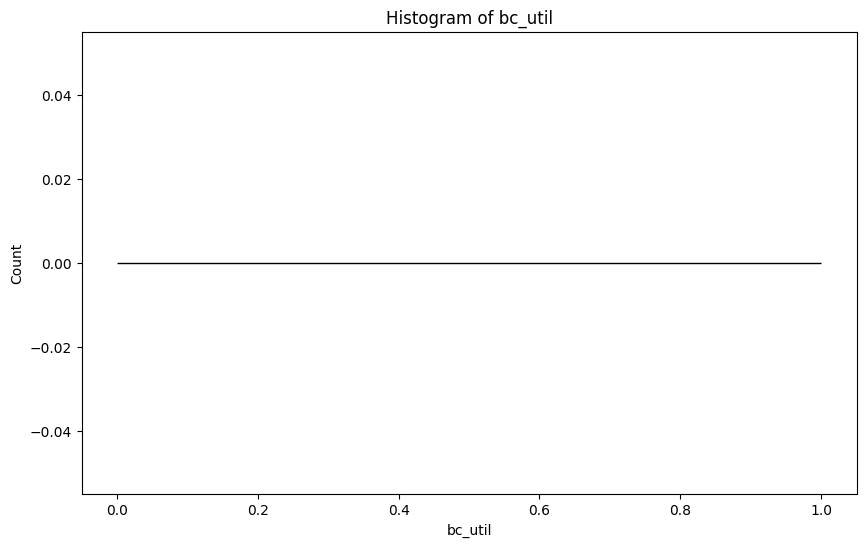

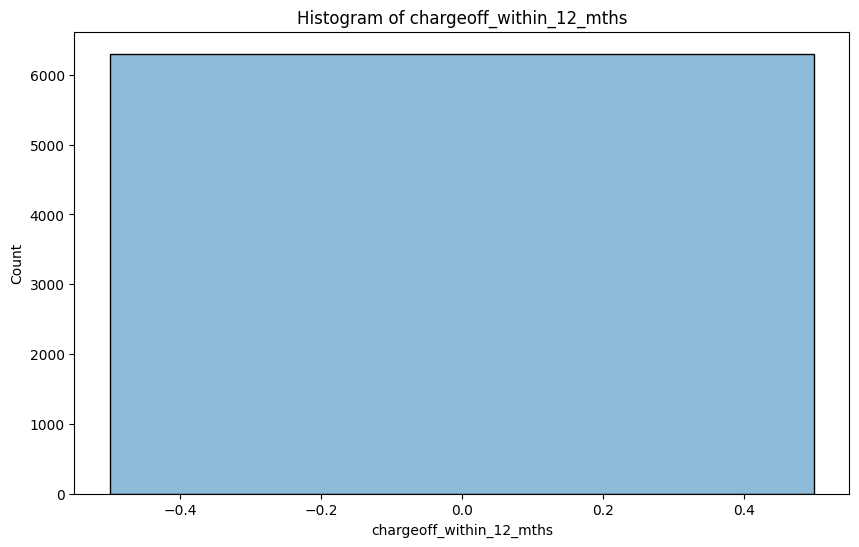

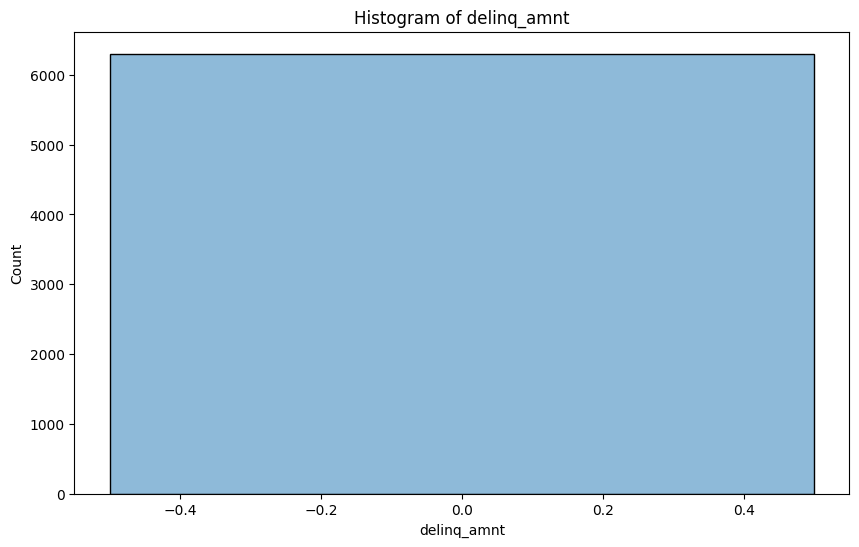

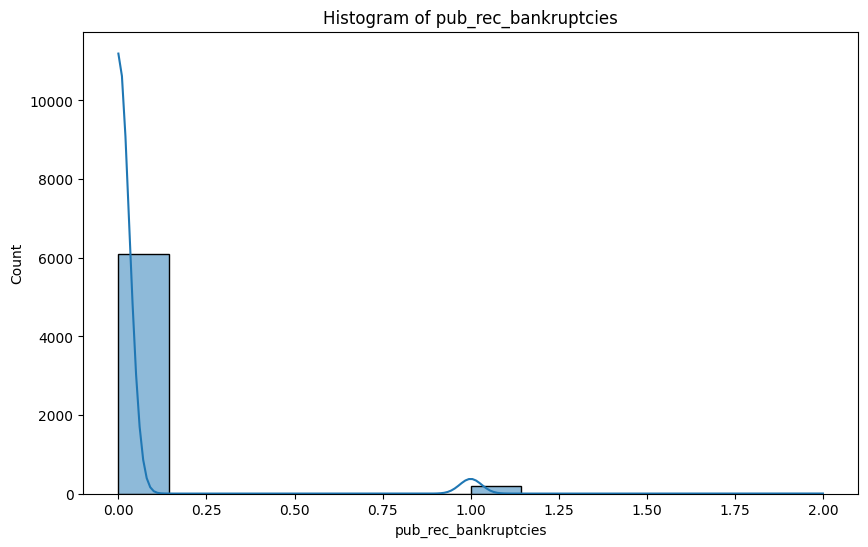

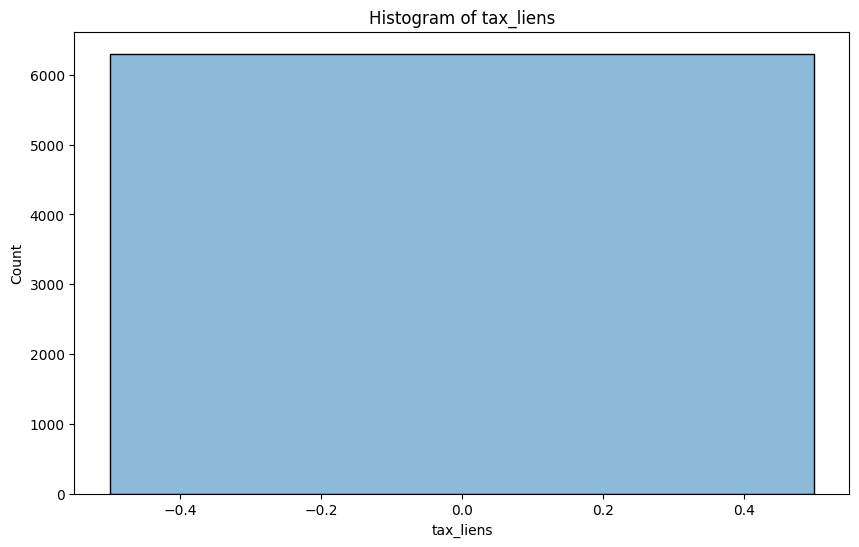

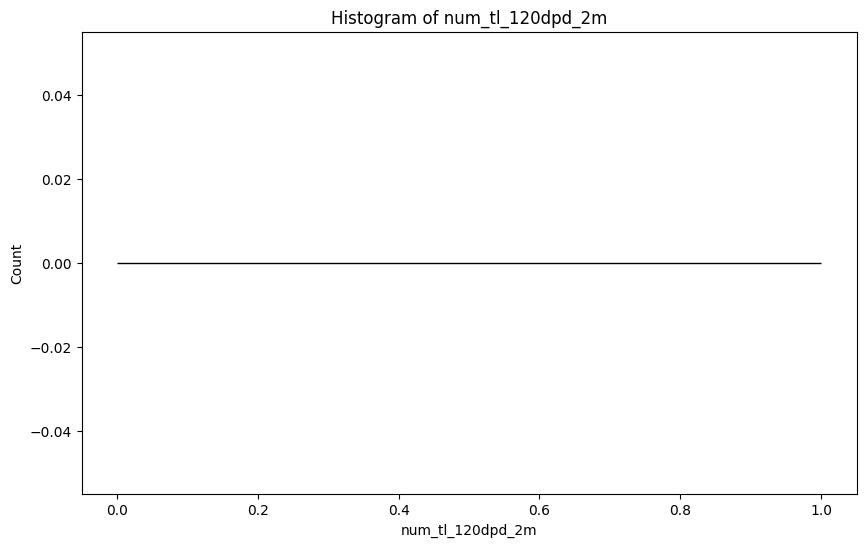

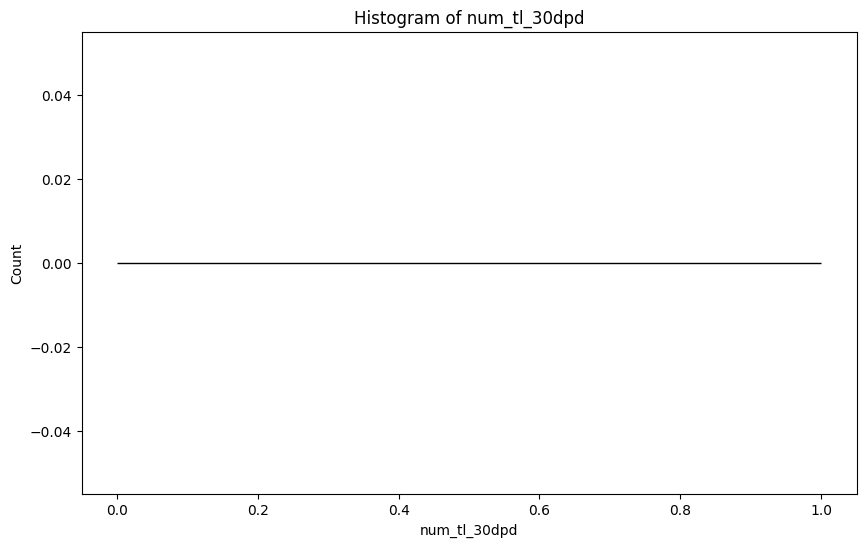

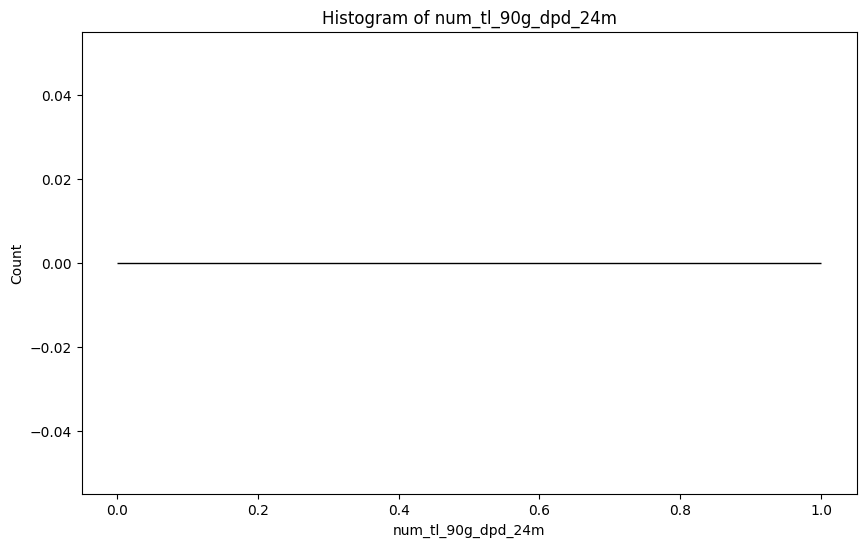

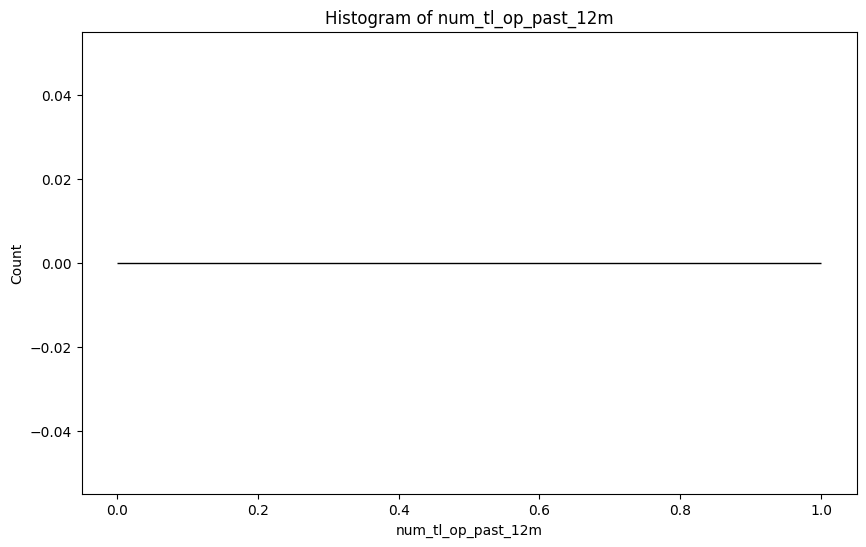

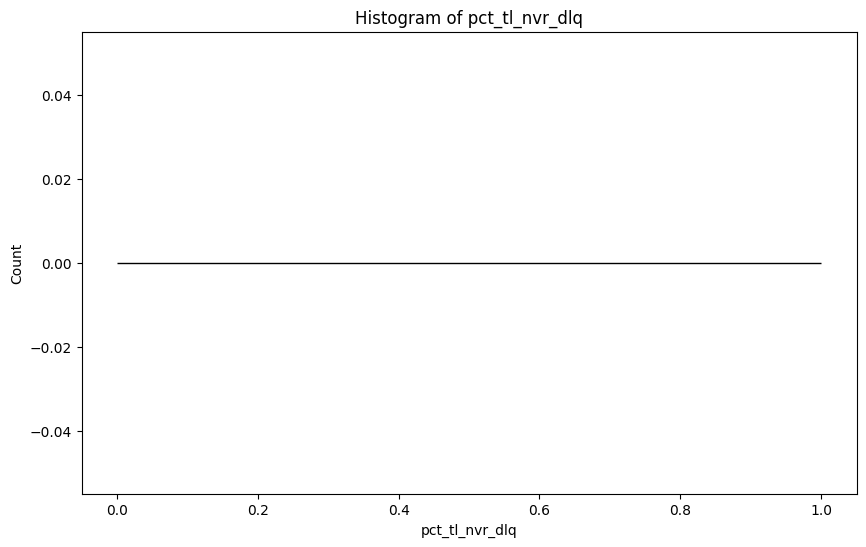

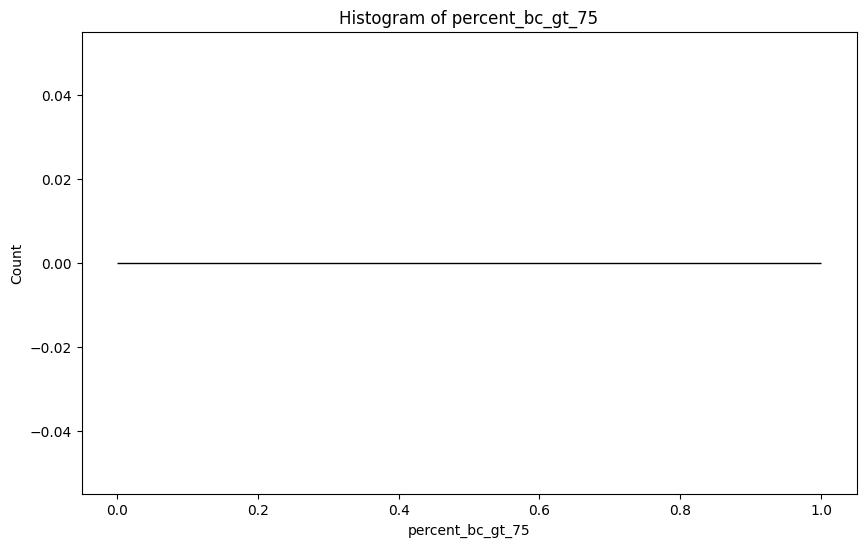

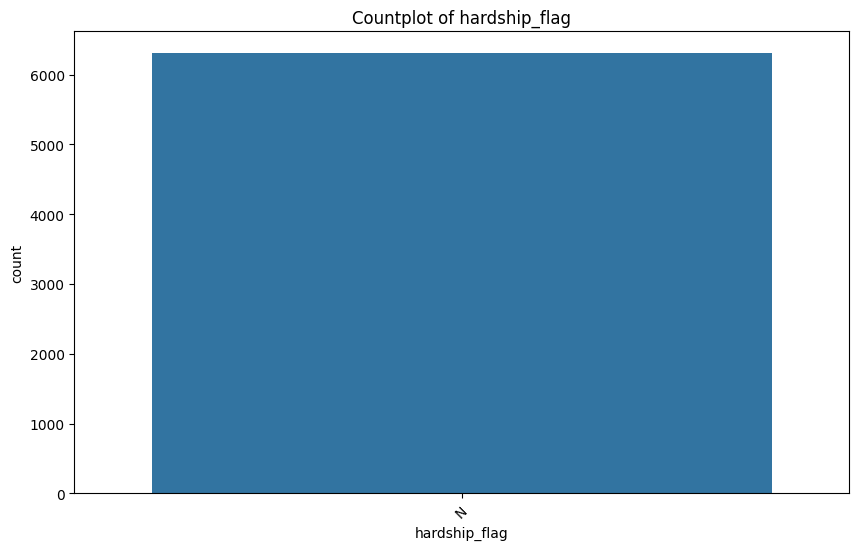

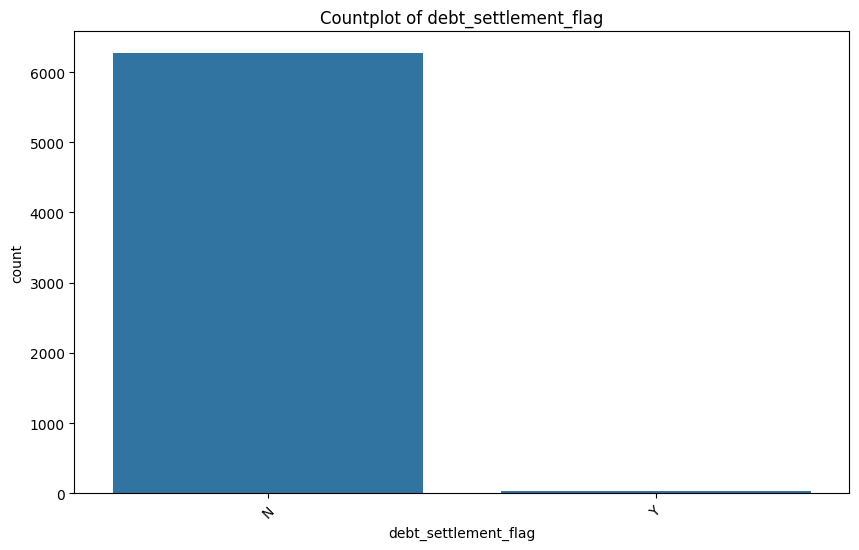

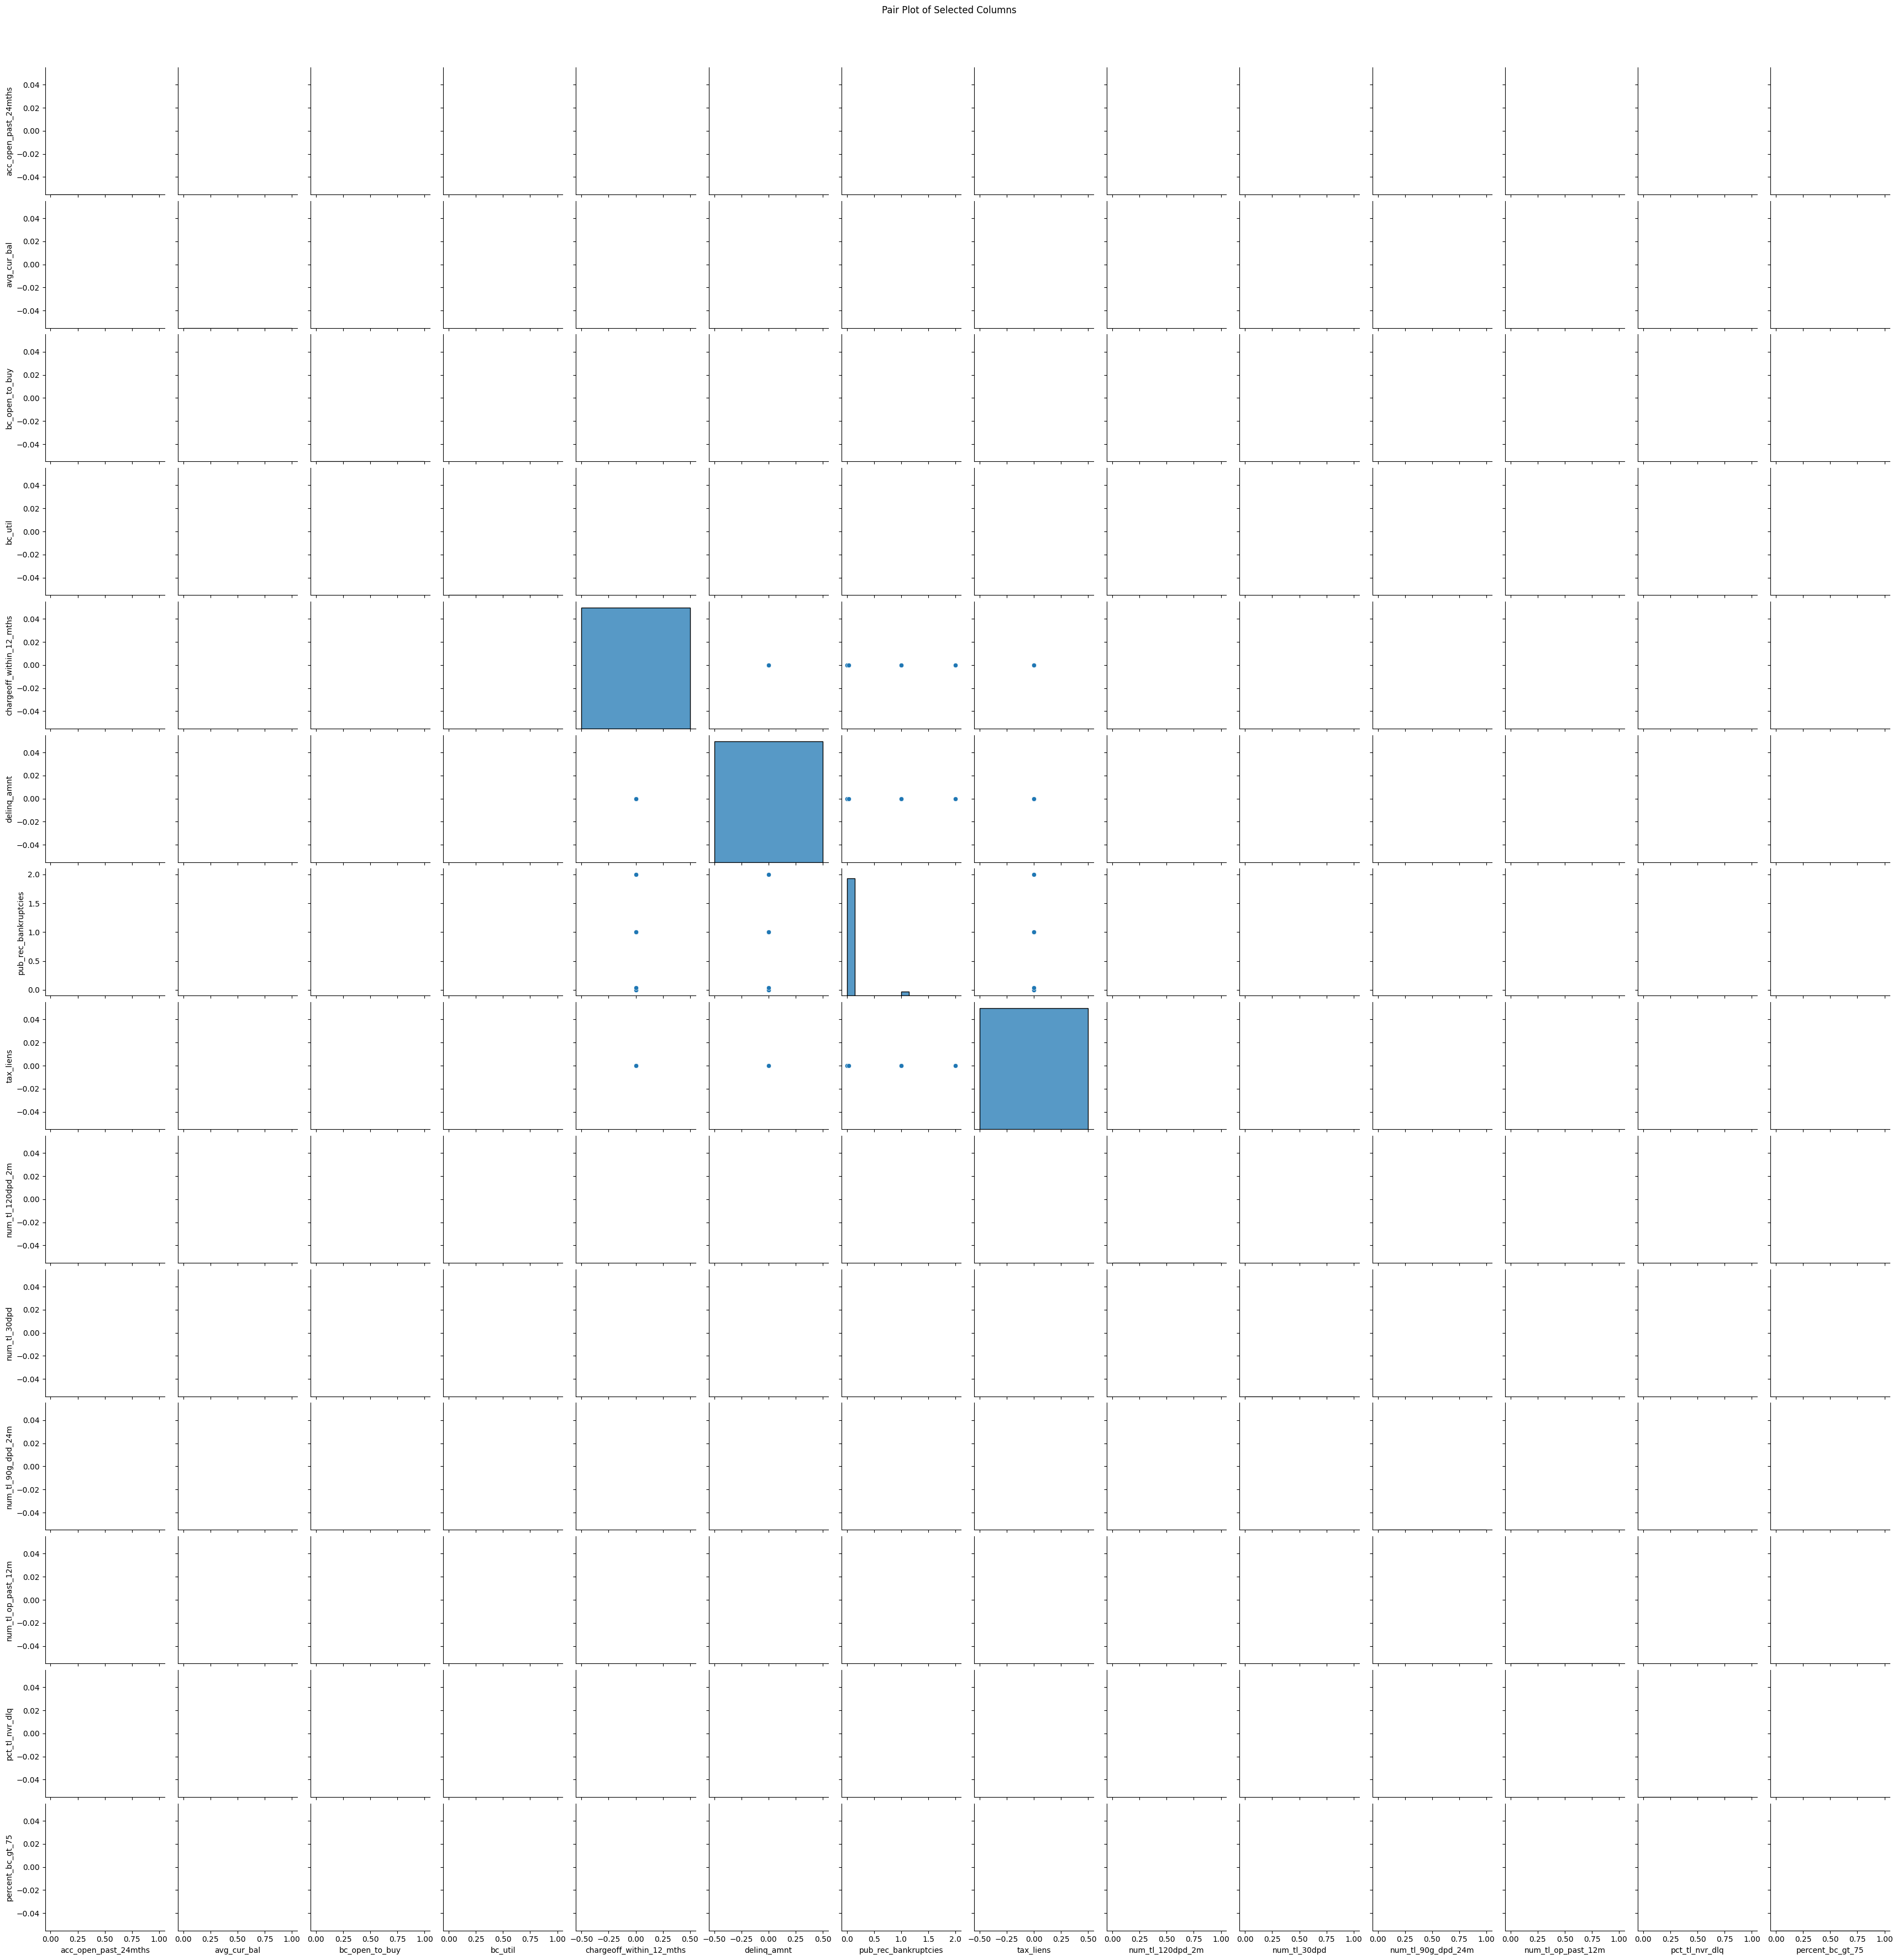

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the subset of columns for EDA
columns_for_eda = ['acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                   'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens',
                   'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
                   'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'hardship_flag', 'debt_settlement_flag']

# EDA for individual columns
for column in columns_for_eda:
    plt.figure(figsize=(10, 6))  # Set the figure size

    if data[column].dtype == 'object':  # For categorical columns
        sns.countplot(x=column, data=data)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.title(f"Countplot of {column}")
        plt.show()

    elif data[column].dtype in ['int64', 'float64']:  # For numerical columns
        sns.histplot(data[column], kde=True)
        plt.title(f"Histogram of {column}")
        plt.show()


sns.pairplot(data[columns_for_eda])
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()



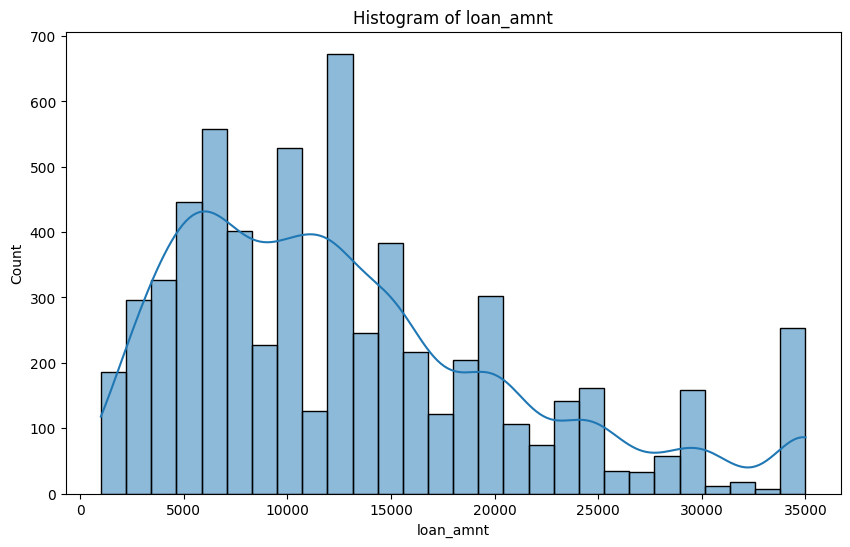

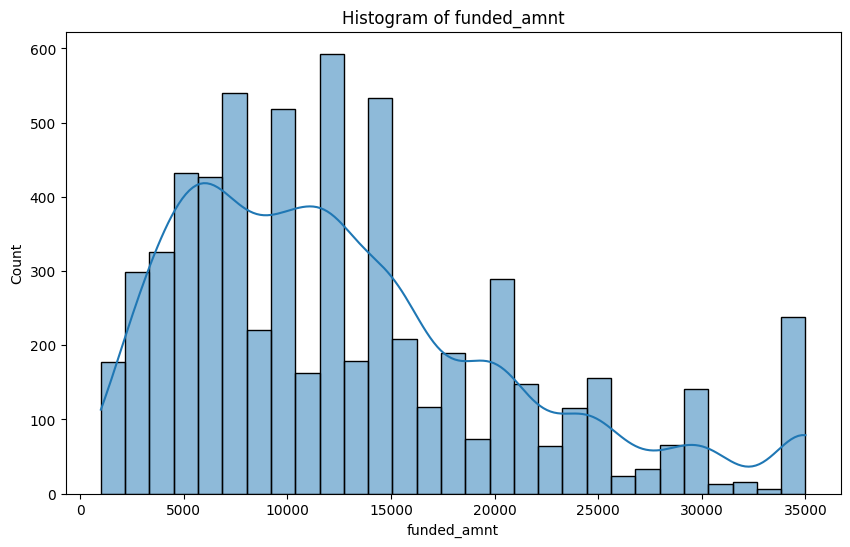

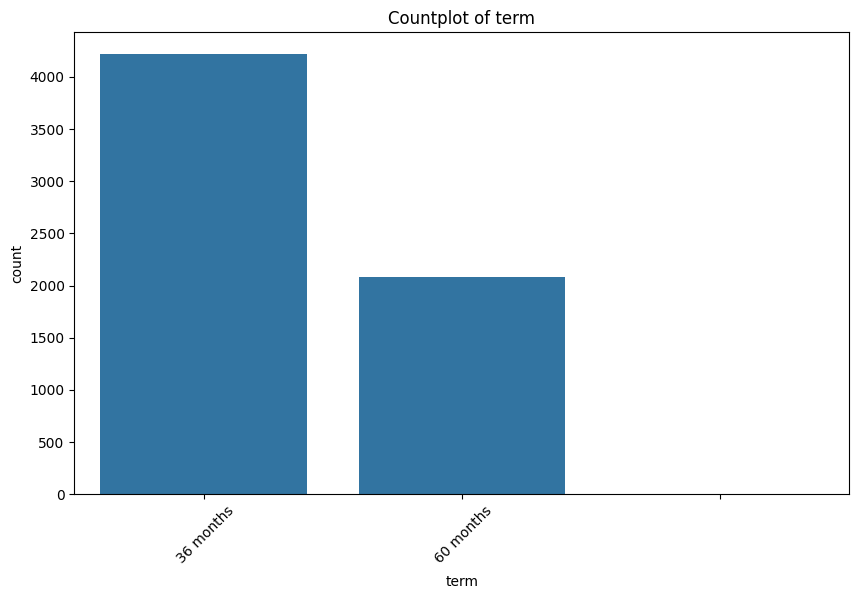

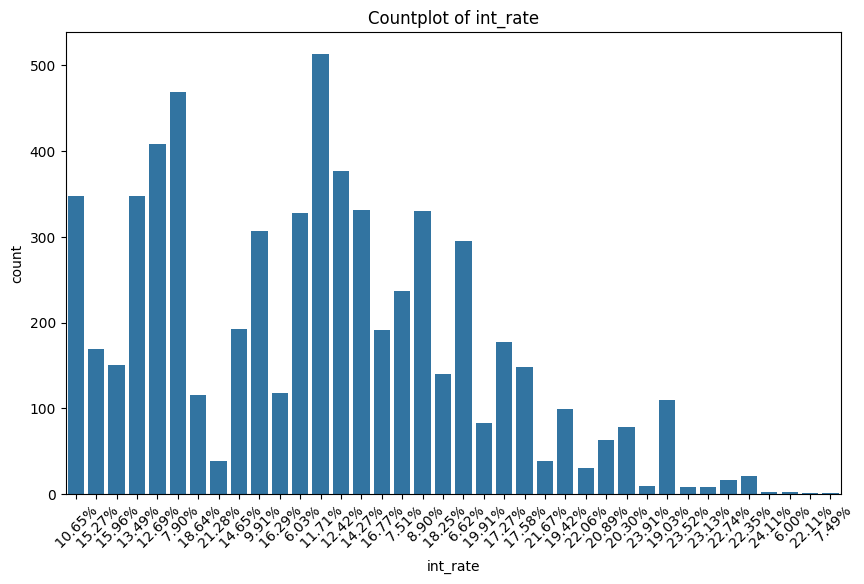

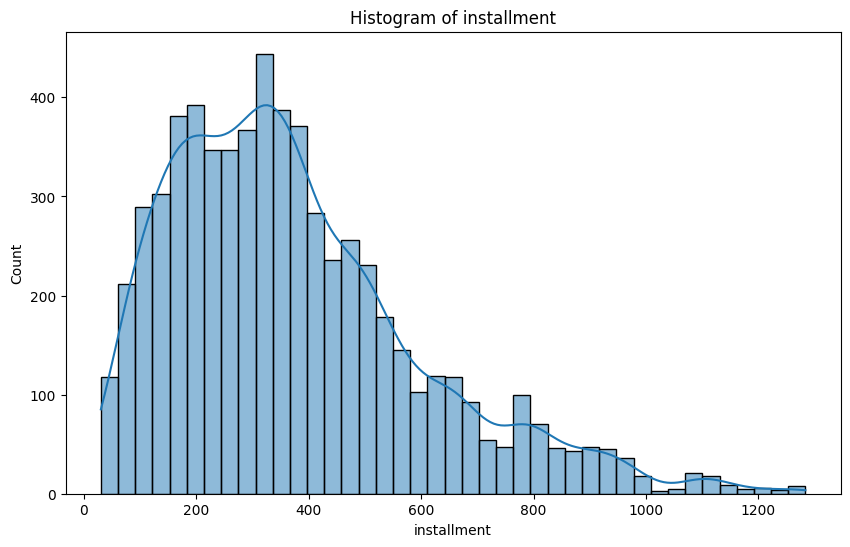

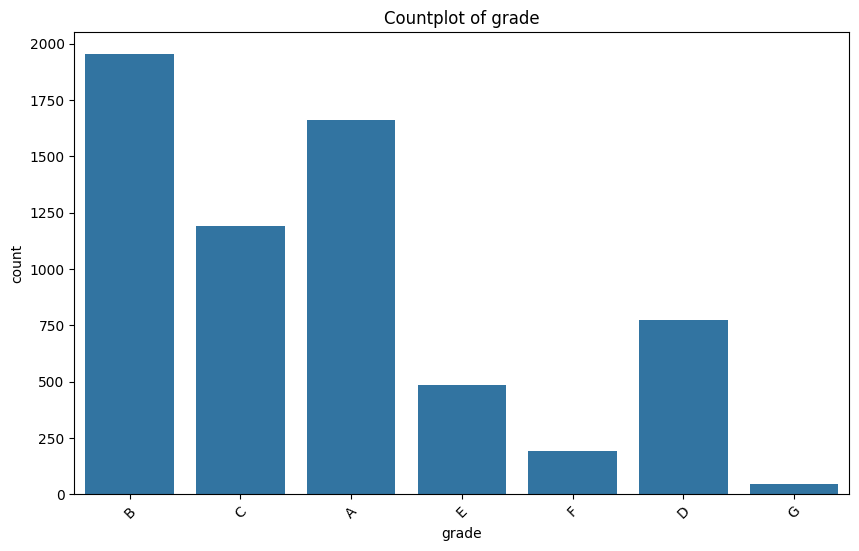

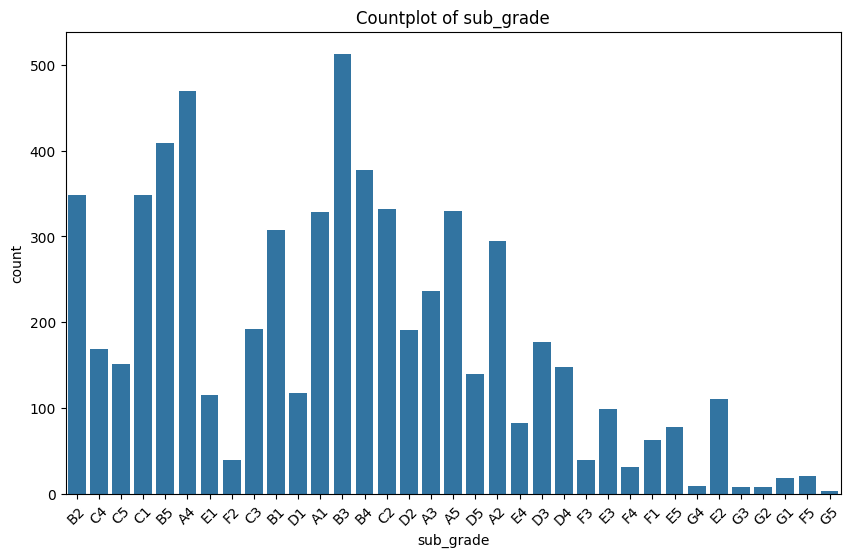

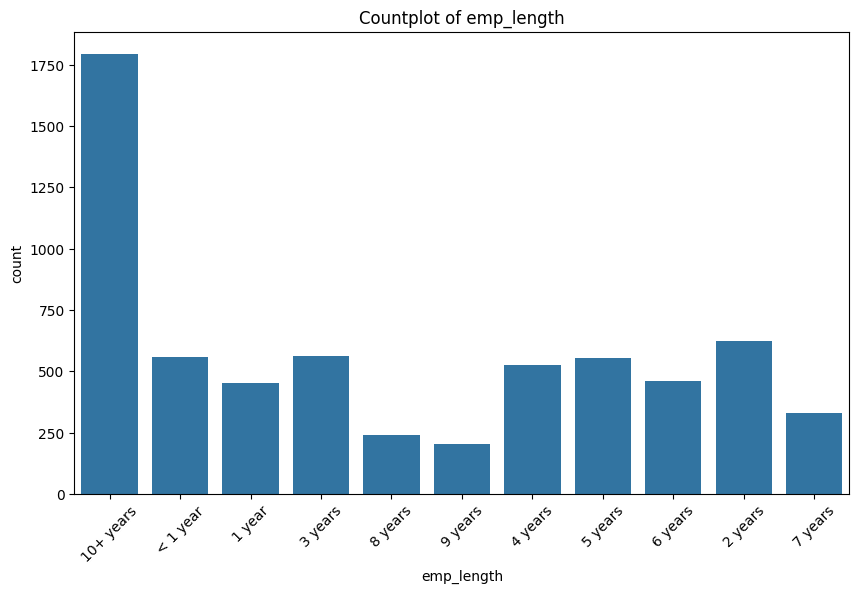

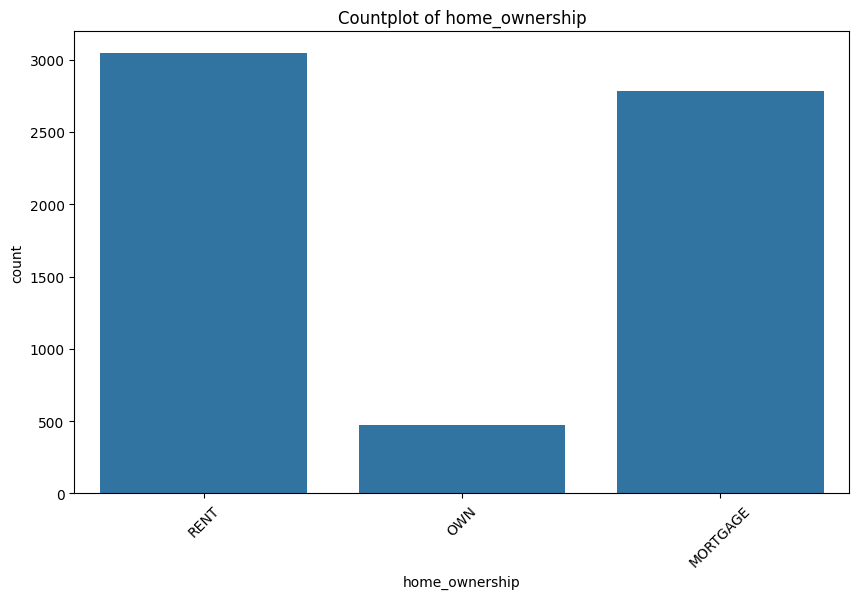

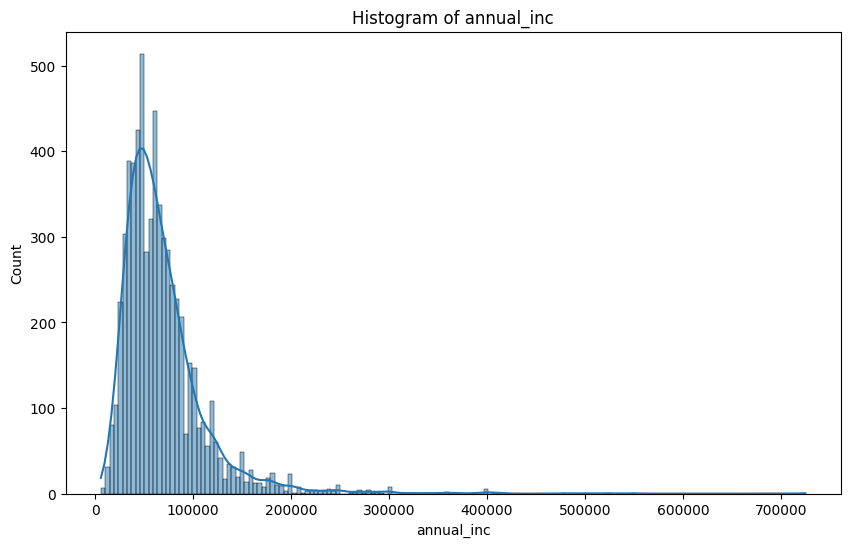

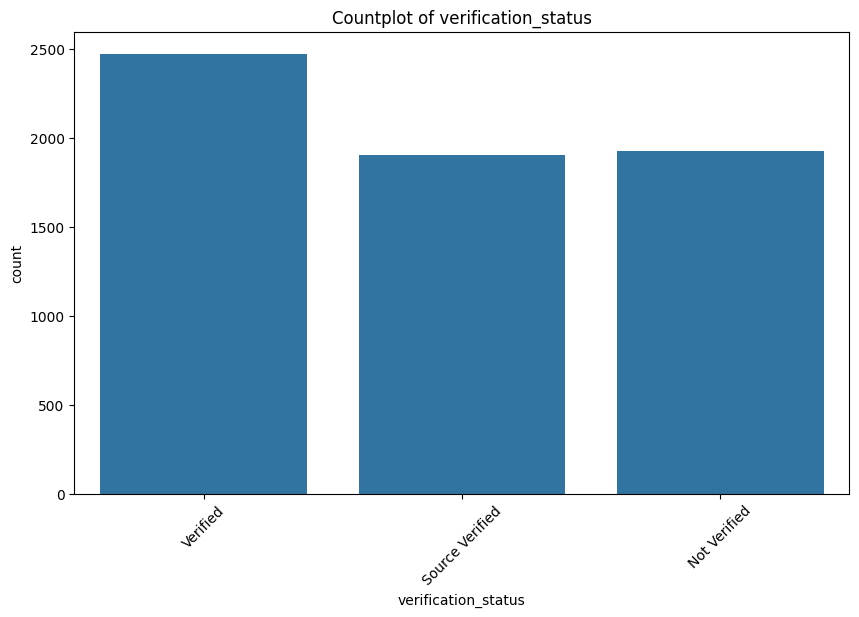

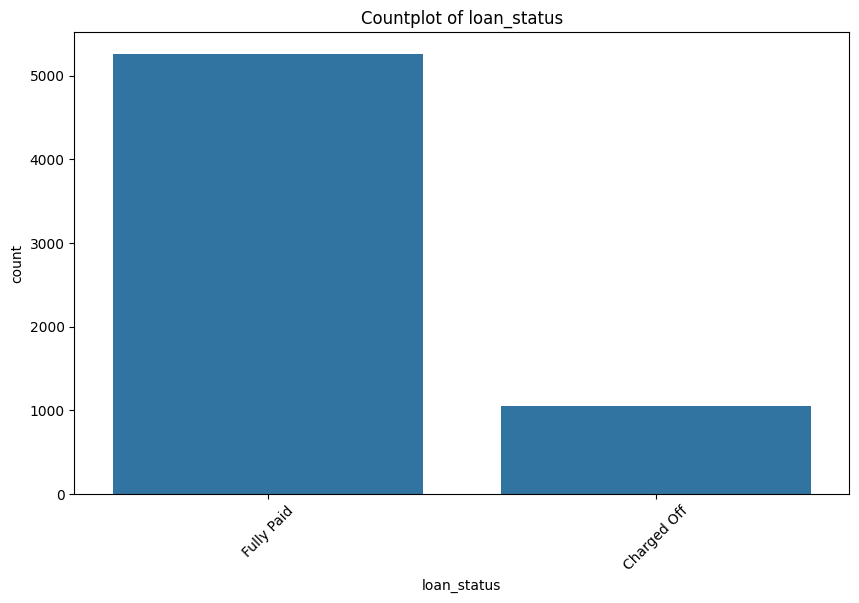

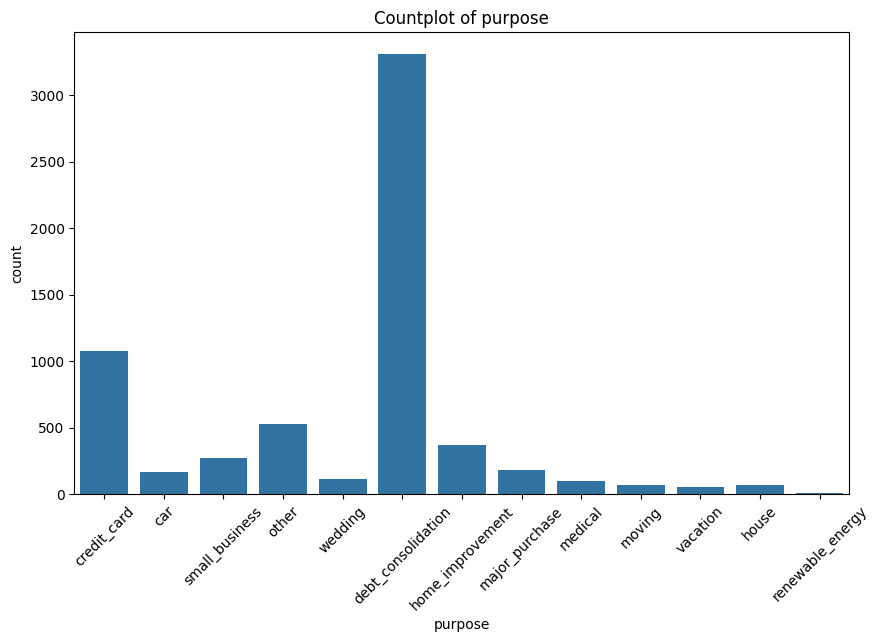

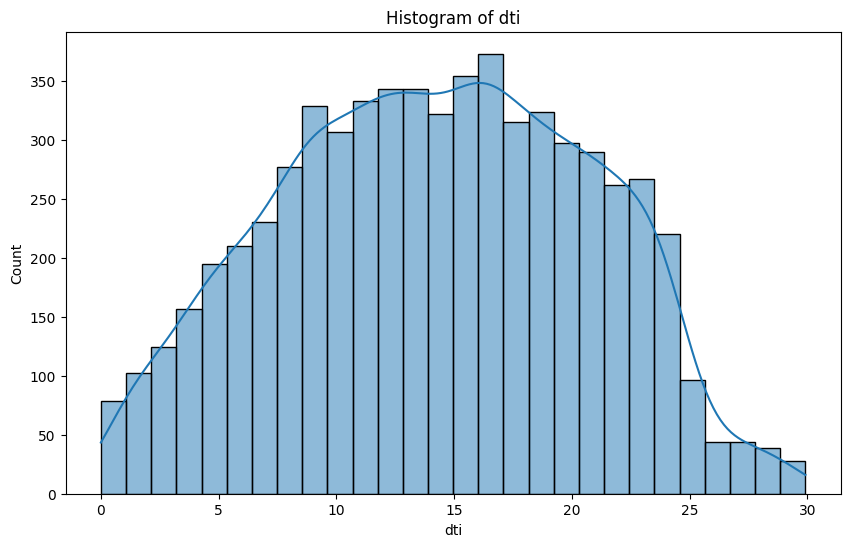

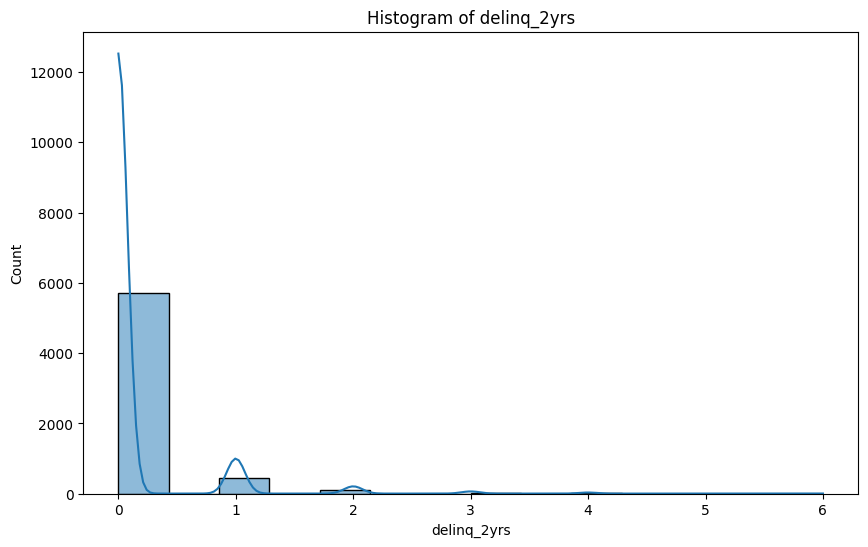

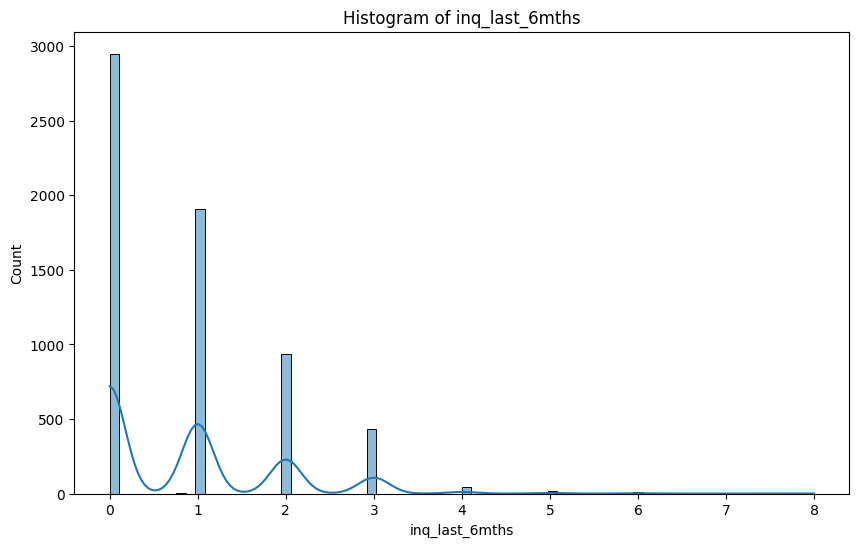

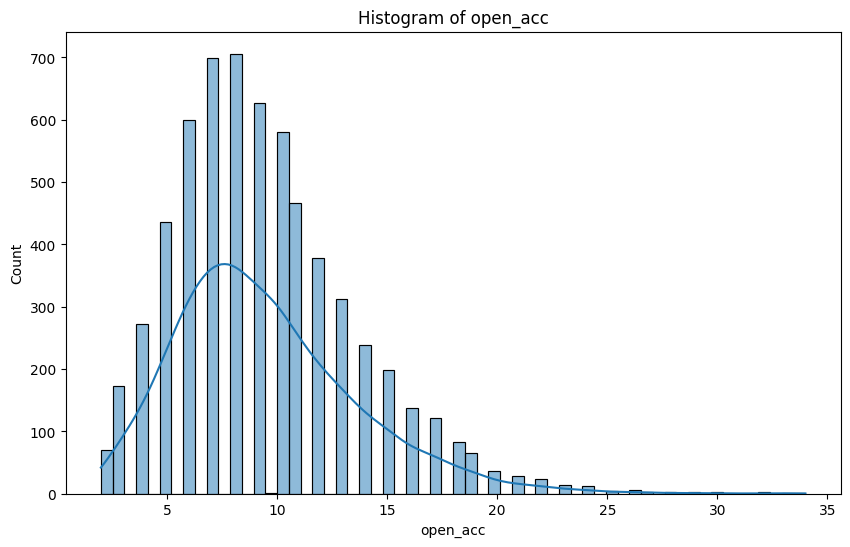

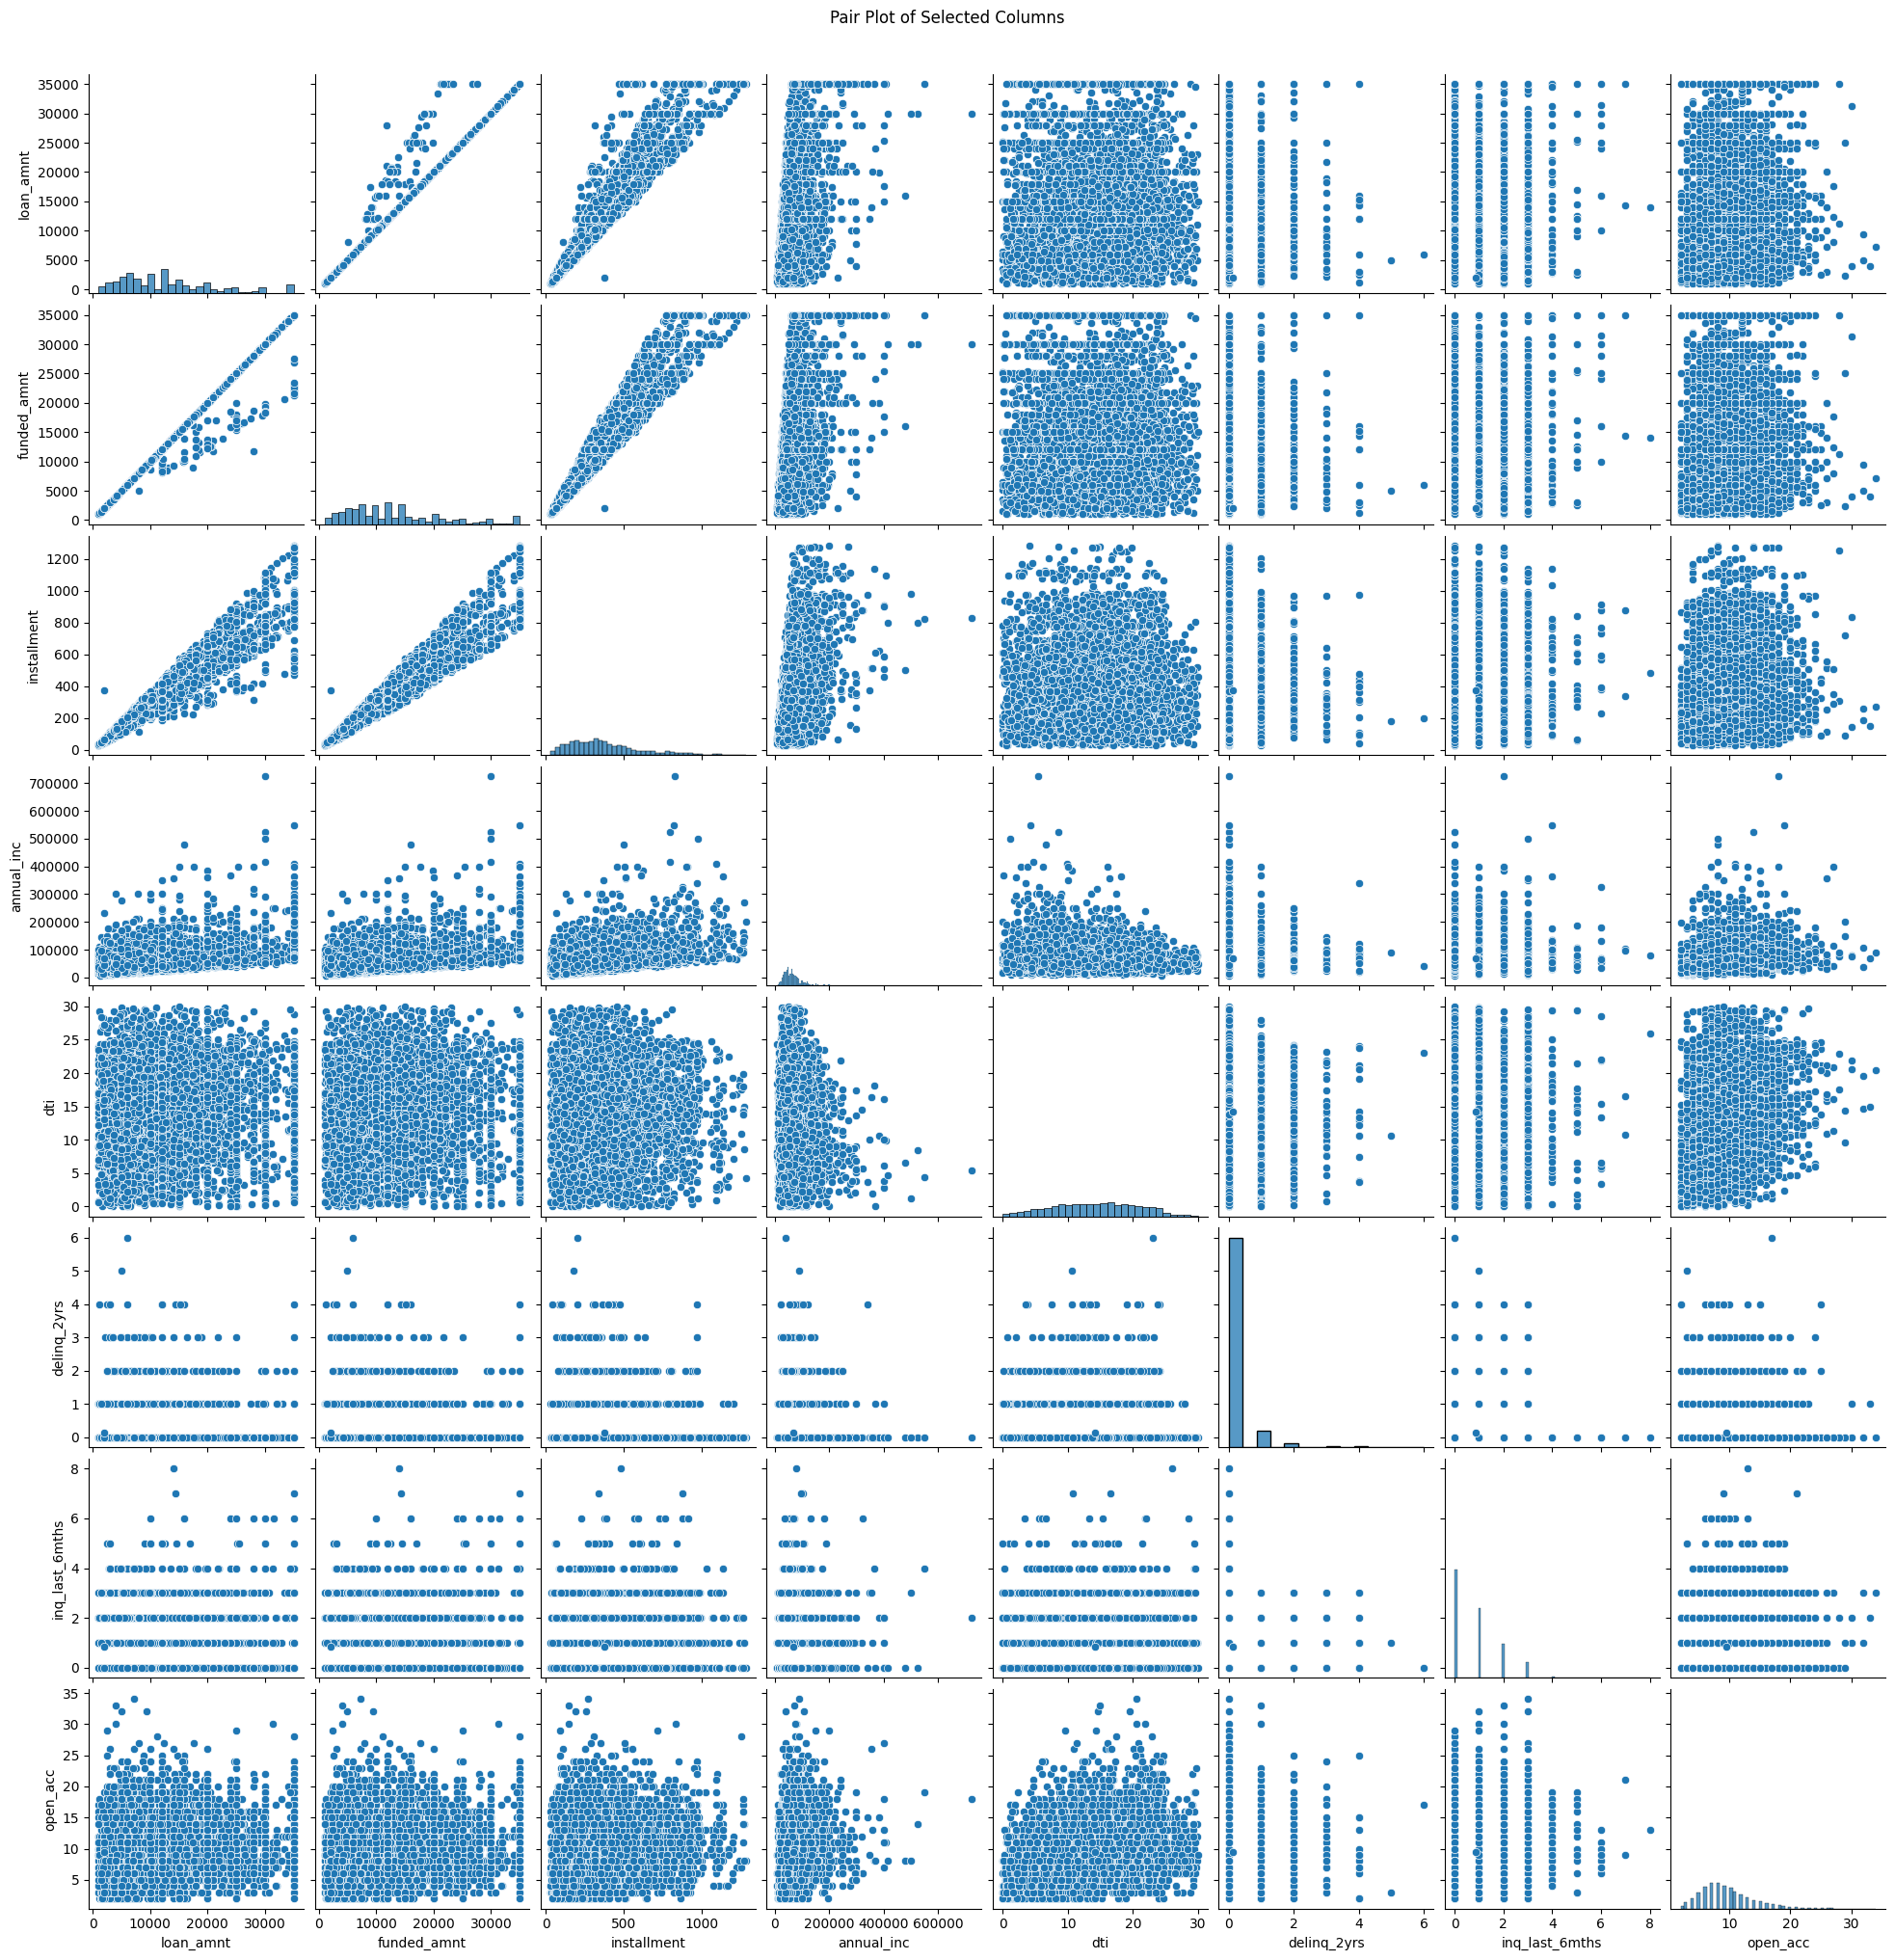

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the subset of columns for EDA
columns_for_eda = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                   'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
                   'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc']

# EDA for individual columns
for column in columns_for_eda:
    plt.figure(figsize=(10, 6))  # Set the figure size

    if data[column].dtype == 'object':  # For categorical columns
        sns.countplot(x=column, data=data)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.title(f"Countplot of {column}")
        plt.show()

    elif data[column].dtype in ['int64', 'float64']:  # For numerical columns
        sns.histplot(data[column], kde=True)
        plt.title(f"Histogram of {column}")
        plt.show()

# Pair plot for the specified columns
sns.pairplot(data[columns_for_eda])
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()
